In [3]:
import os
import sys
import math

sys.path.append('../python')
sys.path.append('../')

# sys.path.append('/home/feldheimlab/Documents/pyWholeBrain/')

from scipy.stats import poisson
from scipy.stats import nbinom
import scipy.io as sio

from preprocessing import *
from distributions_fit import *
from visualizations import *
from auditory_analysis_pipeline import data_load, get_IDs

from config import configs
from hdf5manager import hdf5manager as h5

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

config = configs()
wd = '/Users/ackmanadmin/Documents/test_dataset_auditory_pipeline/2026-02-06-0/kilosort4/'
#necessary paths
dataloc = wd

assert os.path.exists(dataloc), 'Could not find: {}'.format(dataloc)
config.dataloc = dataloc
config.parentdir = os.path.dirname(dataloc)
config.savedir = os.path.join(config.parentdir, 'results')
if not os.path.exists(config.savedir):
    os.mkdir(config.savedir)


imagedir = None
config.spikesorting = 'kilosort4'
config.class_col = 'group'
config.group = 'good'
config.probe = 'npxl'
config.rate = 30000

print(config.savedir)
textoutput = os.path.join(config.savedir, 'processing_log.txt')
with open(textoutput, 'w') as f:
    data_raw = data_load(dataloc, spikesorting='kilosort4', class_col='group', group='good', rate=config.rate, f=f)


/Users/ackmanadmin/Documents/test_dataset_auditory_pipeline/2026-02-06-0/kilosort4/results


In [34]:
dir(data_raw)

['IDs',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'asdf',
 'chanmap',
 'chanposition',
 'class_col',
 'cluster',
 'datasep',
 'group',
 'spikesorting',
 'templates',
 'ttl_times']

(array([90.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,  4.,  1.]),
 array([ 999.966 , 1050.7694, 1101.5728, 1152.3762, 1203.1796, 1253.983 ,
        1304.7864, 1355.5898, 1406.3932, 1457.1966, 1508.    ]),
 <BarContainer object of 10 artists>)

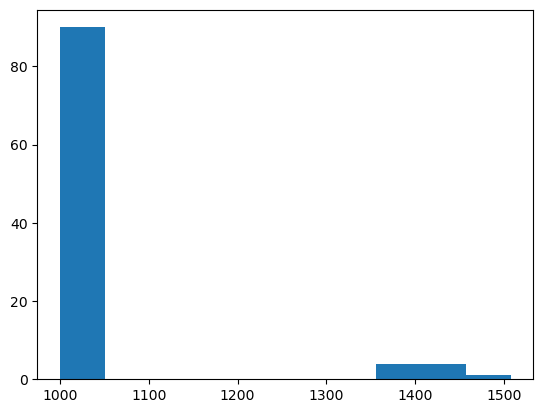

In [20]:
rise2 = np.array(data_raw.ttl_times)[::6]
window = np.array(rise2)[(rise2>=start)&(rise2 < end)]
plt.hist(np.diff(window))

In [57]:
window = np.array(rise2)[(rise2>=start)&(rise2 < end)]

bins = np.arange(0,1000+windowsz,windowsz)
print(bins)

[   0   50  100  150  200  250  300  350  400  450  500  550  600  650
  700  750  800  850  900  950 1000]


[ 646668.9    799779.967  977588.8   9452736.8   9585383.533 9700881.5  ]
0    good
Name: group, dtype: object
Lambda: 0.0008411214953271028, dipsersion: 0.0008404140099572019


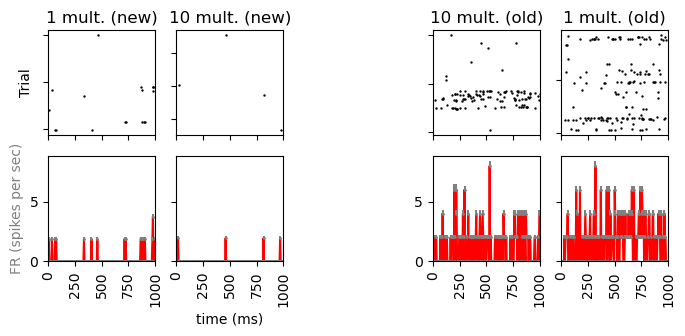

1    good
Name: group, dtype: object
Lambda: 0.0006074766355140187, dipsersion: 0.0006071076076513233


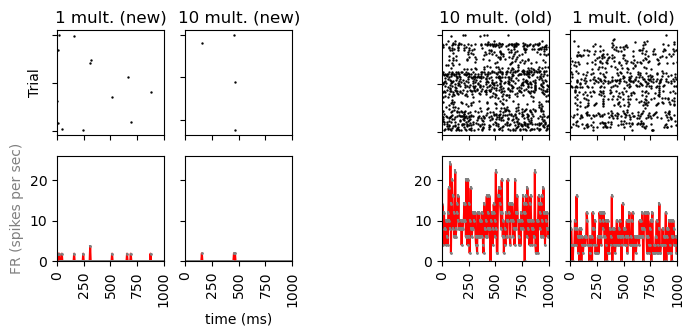

3    good
Name: group, dtype: object
Lambda: 0.00018691588785046728, dipsersion: 0.0001868809503013362


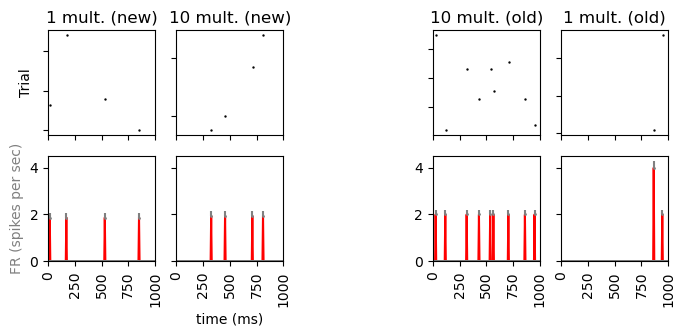

4    good
Name: group, dtype: object
Lambda: 0.06850467289719626, dipsersion: 0.06427907240807057


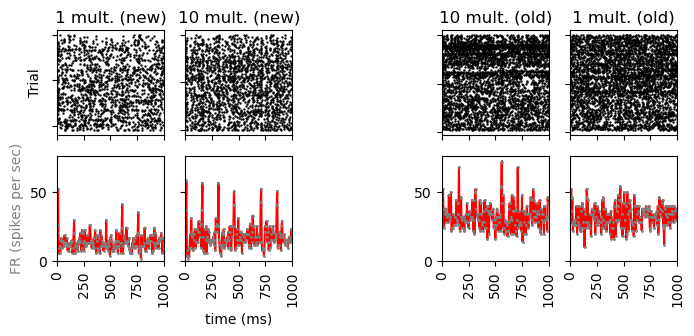

8    good
Name: group, dtype: object
Lambda: 0.01822429906542056, dipsersion: 0.017985631932919906


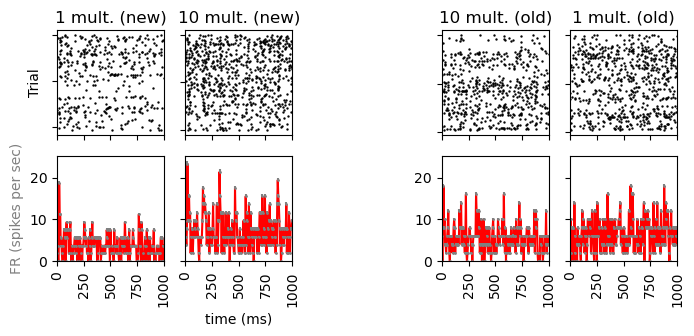

9    good
Name: group, dtype: object
Lambda: 0.015046728971962617, dipsersion: 0.015007240807057377


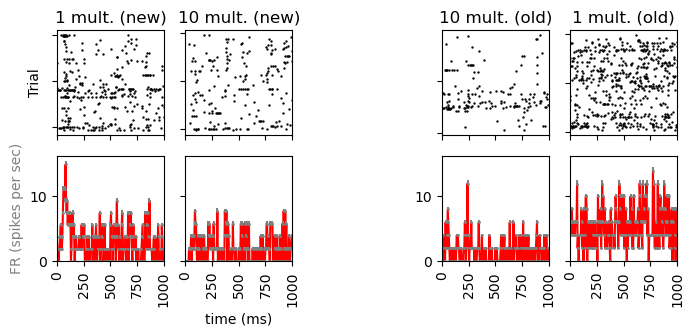

10    good
Name: group, dtype: object
Lambda: 0.053317757009345795, dipsersion: 0.050568431740763385


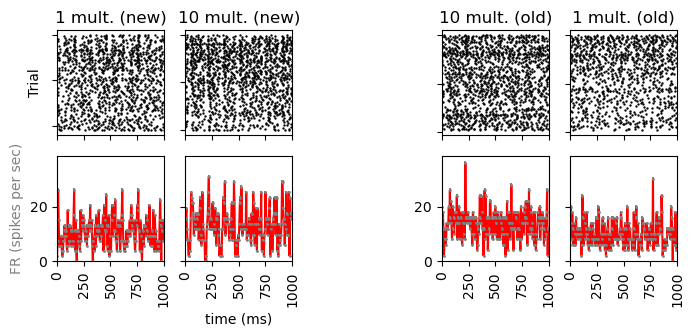

13    good
Name: group, dtype: object
Lambda: 0.06116822429906542, dipsersion: 0.05817433618656651


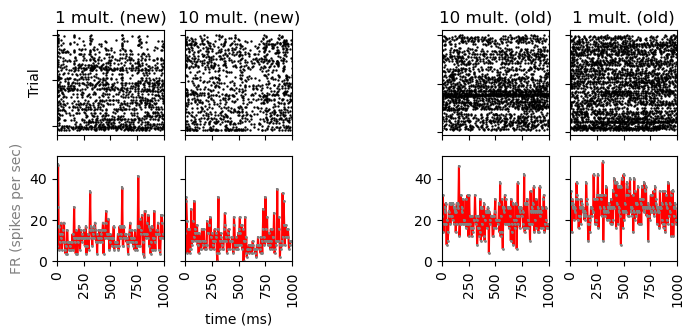

31    good
Name: group, dtype: object
Lambda: 0.13607476635514018, dipsersion: 0.13157711590531923


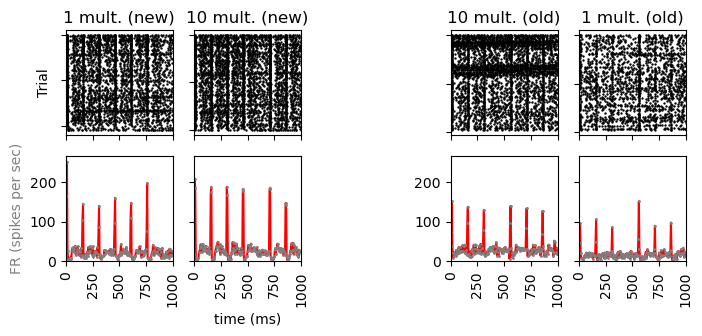

34    good
Name: group, dtype: object
Lambda: 0.07261682242990654, dipsersion: 0.06818474102541709


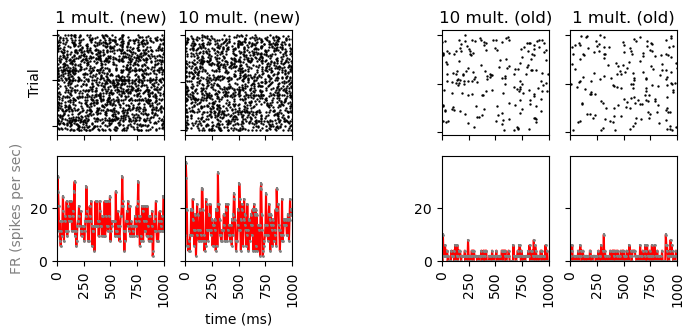

40    good
Name: group, dtype: object
Lambda: 0.04855140186915888, dipsersion: 0.047502574460651606


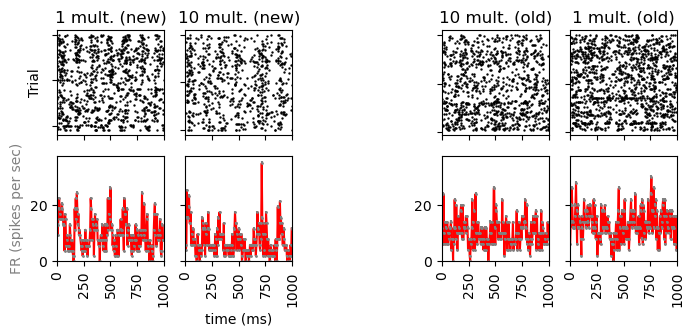

47    good
Name: group, dtype: object
Lambda: 0.04214953271028037, dipsersion: 0.04037294960258539


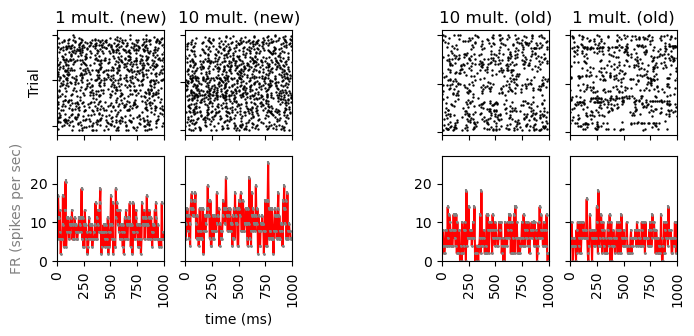

49    good
Name: group, dtype: object
Lambda: 0.043037383177570096, dipsersion: 0.04118516682679711


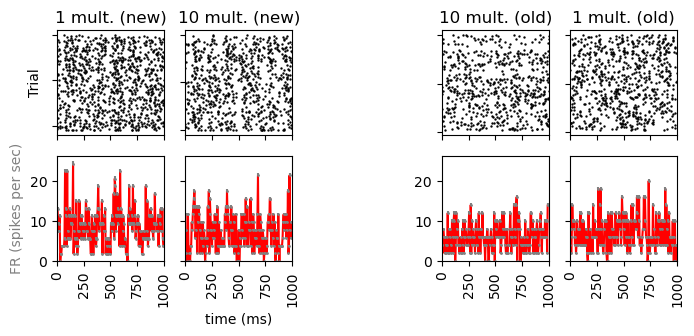

51    good
Name: group, dtype: object
Lambda: 0.03850467289719626, dipsersion: 0.03711552100620142


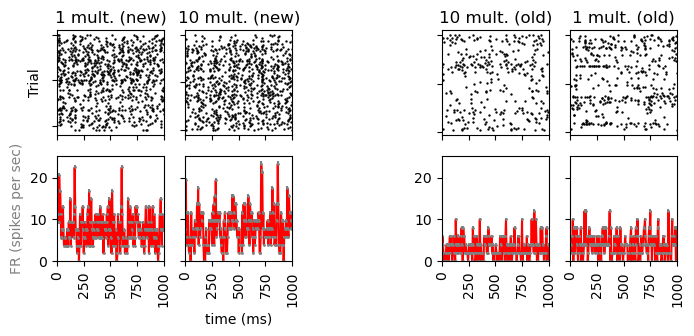

55    good
Name: group, dtype: object
Lambda: 0.0032710280373831778, dipsersion: 0.0032603284129618304


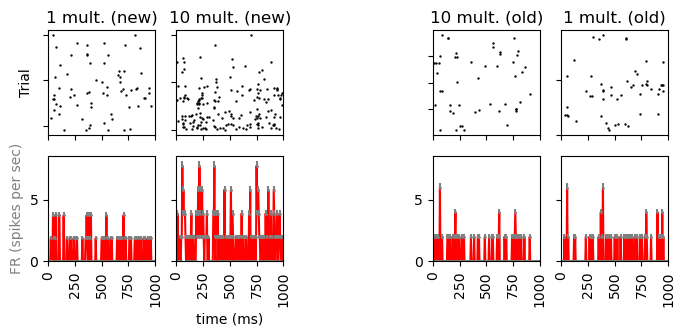

58    good
Name: group, dtype: object
Lambda: 0.0022897196261682244, dipsersion: 0.0022844768102017647


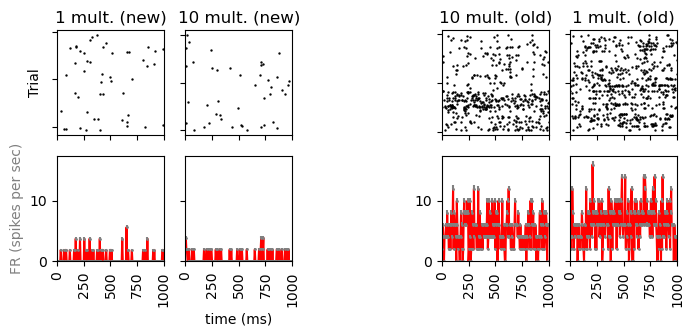

67    good
Name: group, dtype: object
Lambda: 0.15537383177570094, dipsersion: 0.13254121538999036


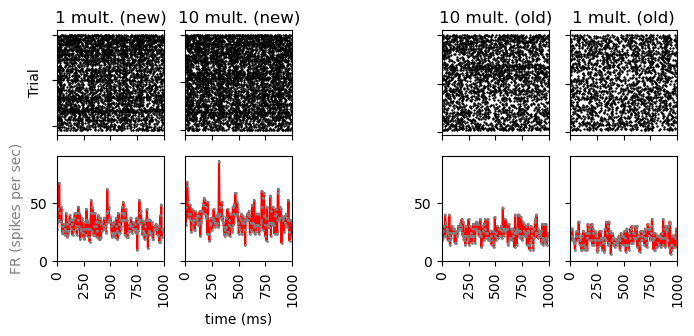

74    good
Name: group, dtype: object
Lambda: 0.13322429906542055, dipsersion: 0.11594287492357412


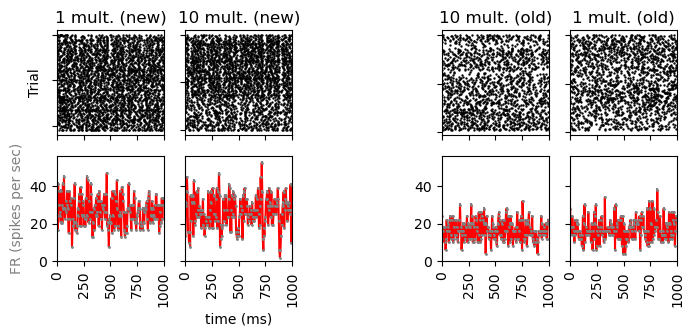

85    good
Name: group, dtype: object
Lambda: 0.0026635514018691587, dipsersion: 0.0027499148397239926


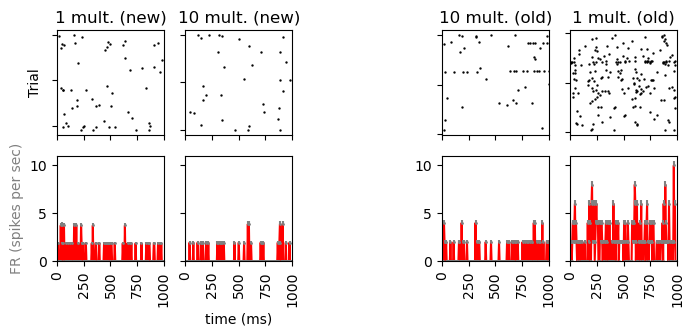

86    good
Name: group, dtype: object
Lambda: 0.015841121495327102, dipsersion: 0.015590180365097388


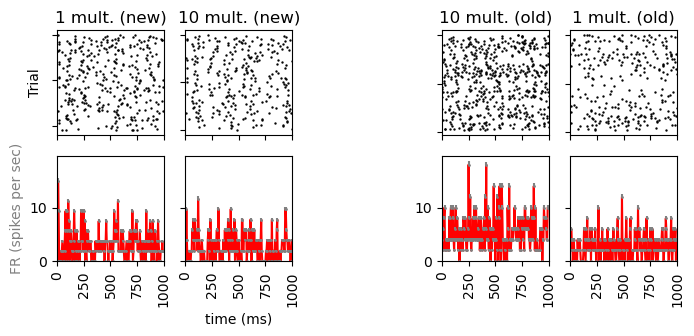

89    good
Name: group, dtype: object
Lambda: 0.14271028037383177, dipsersion: 0.12271788802515506


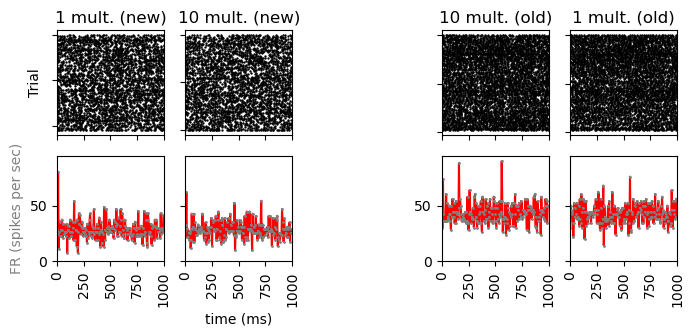

95    good
Name: group, dtype: object
Lambda: 0.0388785046728972, dipsersion: 0.03746042449122193


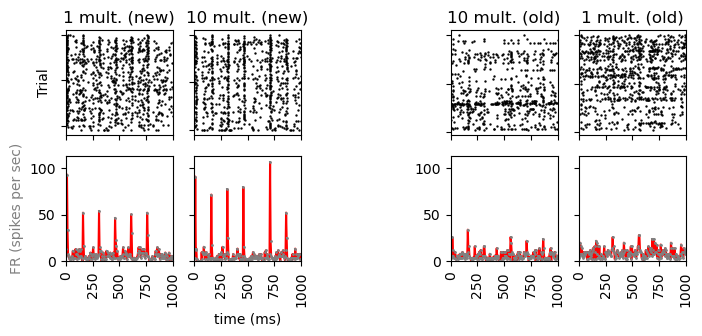

97    good
Name: group, dtype: object
Lambda: 0.2016822429906542, dipsersion: 0.16147380557253907


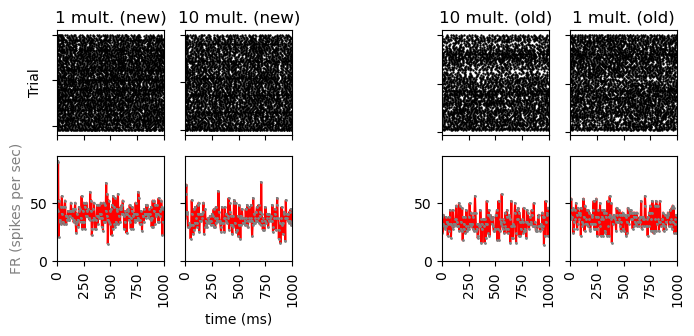

101    good
Name: group, dtype: object
Lambda: 0.004299065420560748, dipsersion: 0.004280583457070487


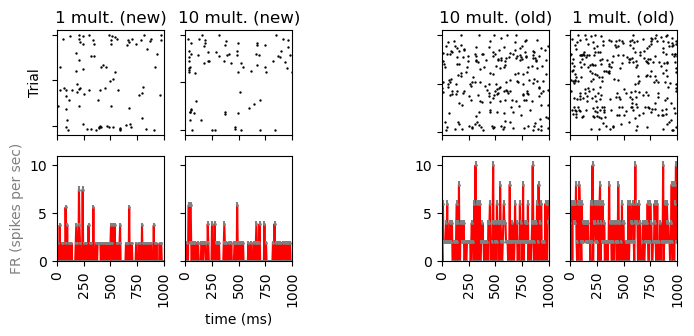

103    good
Name: group, dtype: object
Lambda: 0.0880373831775701, dipsersion: 0.08178212944361954


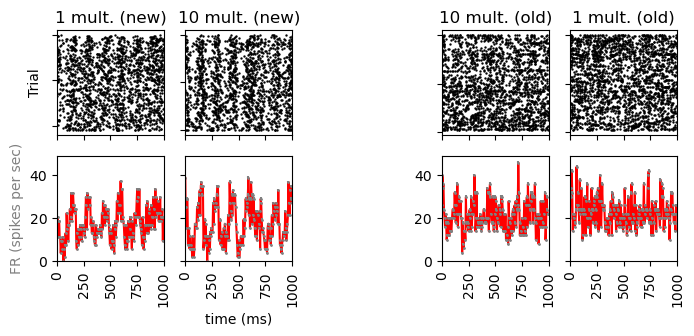

104    good
Name: group, dtype: object
Lambda: 0.0006542056074766356, dipsersion: 0.0006537776224997818


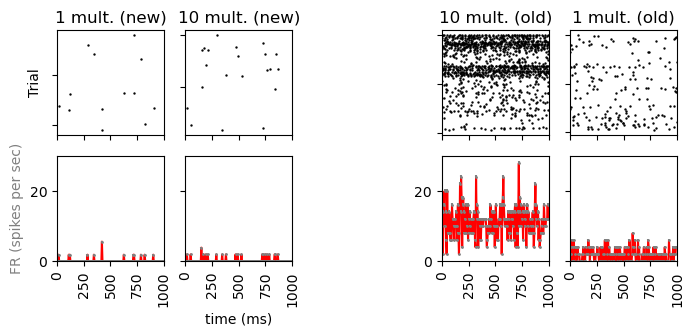

110    good
Name: group, dtype: object
Lambda: 0.14574766355140187, dipsersion: 0.130019300812298


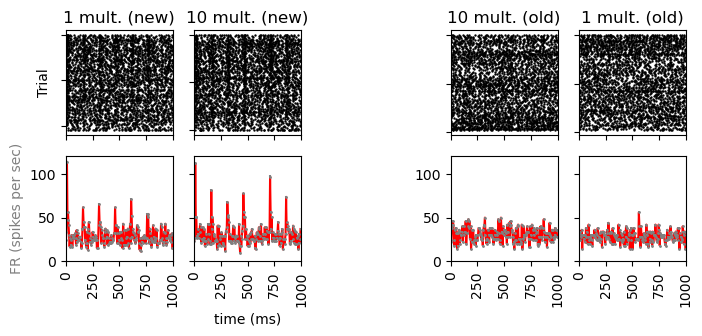

114    good
Name: group, dtype: object
Lambda: 0.1897196261682243, dipsersion: 0.19438029522229014


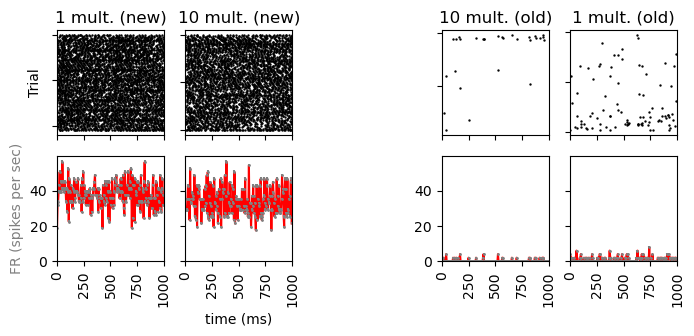

115    good
Name: group, dtype: object
Lambda: 0.19710280373831776, dipsersion: 0.20115048475849417


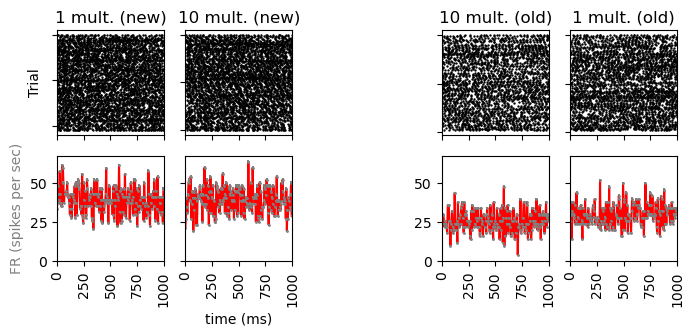

123    good
Name: group, dtype: object
Lambda: 0.03116822429906542, dipsersion: 0.032813588523015115


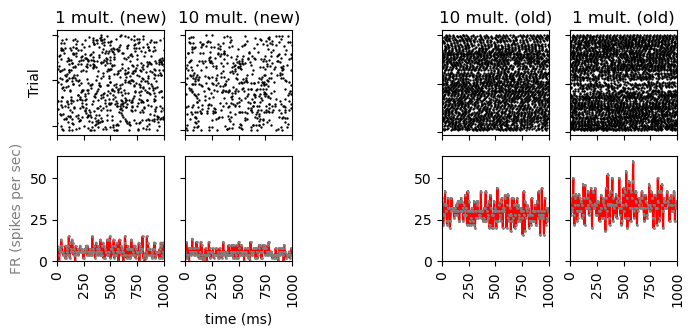

131    good
Name: group, dtype: object
Lambda: 0.013457943925233645, dipsersion: 0.013744117390165083


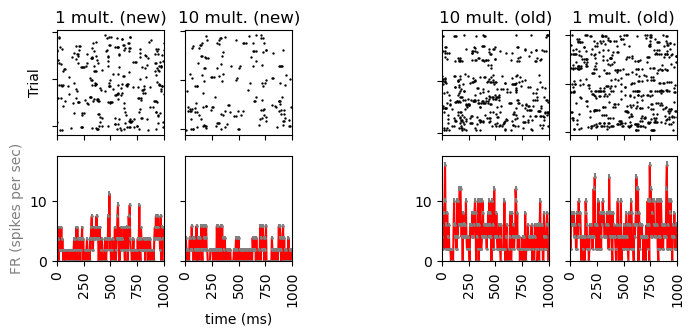

137    good
Name: group, dtype: object
Lambda: 4.672897196261682e-05, dipsersion: 4.672678836579616e-05


/Users/ackmanadmin/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


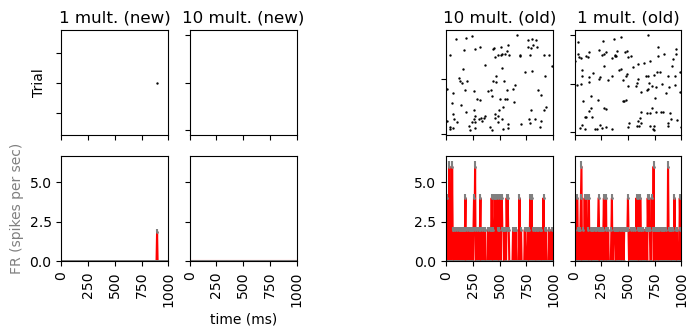

146    good
Name: group, dtype: object
Lambda: 0.02911214953271028, dipsersion: 0.029666501441173908


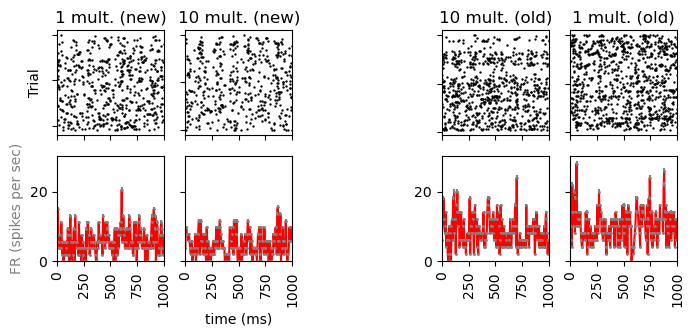

148    good
Name: group, dtype: object
Lambda: 0.07780373831775701, dipsersion: 0.0836194755000437


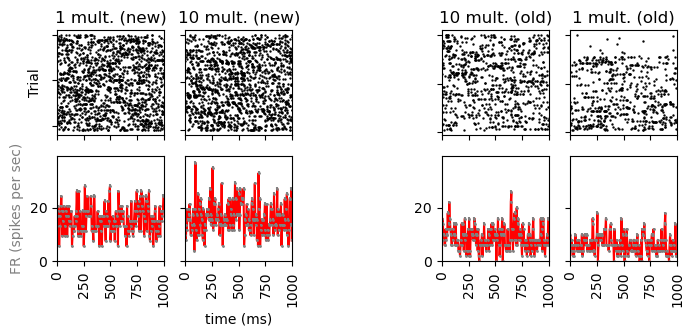

150    good
Name: group, dtype: object
Lambda: 0.02308411214953271, dipsersion: 0.02320544152327714


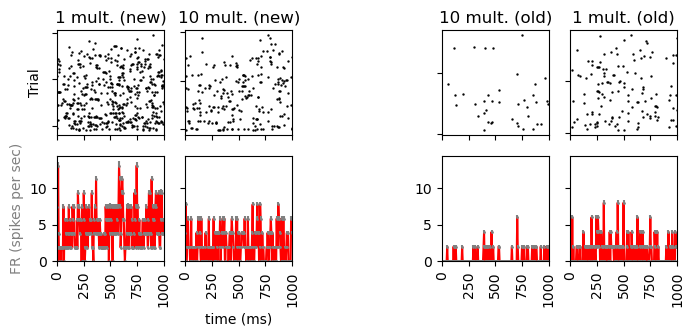

160    good
Name: group, dtype: object
Lambda: 0.022242990654205607, dipsersion: 0.02202861385273823


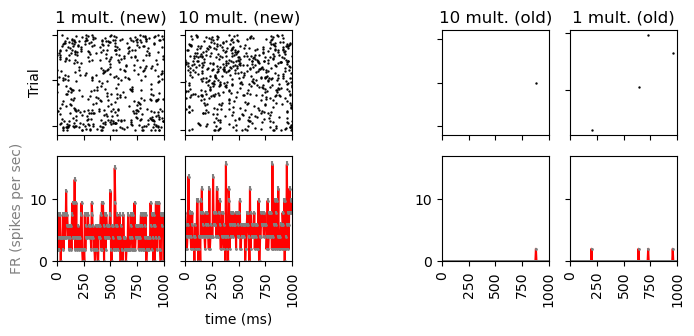

161    good
Name: group, dtype: object
Lambda: 0.00014018691588785047, dipsersion: 0.00014016726351646433


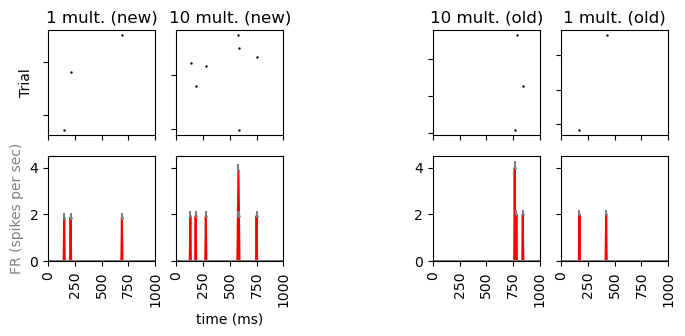

169    good
Name: group, dtype: object


/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:42: RuntimeWarning: invalid value encountered in divide
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:42: RuntimeWarning: invalid value encountered in double_scalars
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)


Lambda: 0.0, dipsersion: 0.0


/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:47: RuntimeWarning: invalid value encountered in divide
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:47: RuntimeWarning: invalid value encountered in double_scalars
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:48: RuntimeWarning: invalid value encountered in divide
  probsmean = 1 - poisson.cdf(np.mean(FRs,0)/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:48: RuntimeWarning: invalid value encountered in double_scalars
  probsmean = 1 - poisson.cdf(np.mean(FRs,0)/poisdisper, poislambda/poisdisper)
/Users/ackmanadmin/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divid

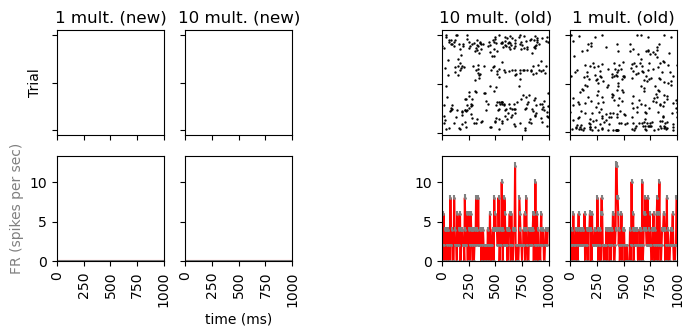

173    good
Name: group, dtype: object


/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:42: RuntimeWarning: invalid value encountered in divide
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:42: RuntimeWarning: invalid value encountered in double_scalars
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)


Lambda: 0.0, dipsersion: 0.0


/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:47: RuntimeWarning: invalid value encountered in divide
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:47: RuntimeWarning: invalid value encountered in double_scalars
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:48: RuntimeWarning: invalid value encountered in divide
  probsmean = 1 - poisson.cdf(np.mean(FRs,0)/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:48: RuntimeWarning: invalid value encountered in double_scalars
  probsmean = 1 - poisson.cdf(np.mean(FRs,0)/poisdisper, poislambda/poisdisper)
/Users/ackmanadmin/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divid

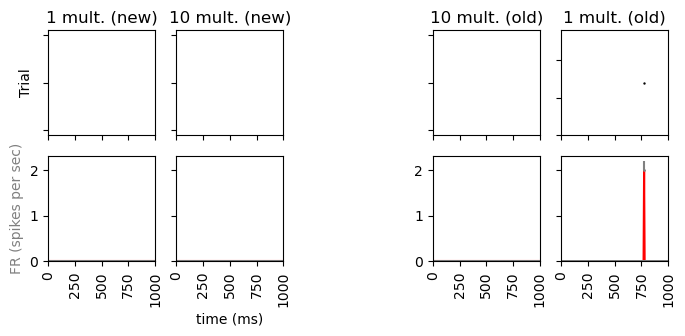

174    good
Name: group, dtype: object


/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:42: RuntimeWarning: invalid value encountered in divide
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:42: RuntimeWarning: invalid value encountered in double_scalars
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)


Lambda: 0.0, dipsersion: 0.0


/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:47: RuntimeWarning: invalid value encountered in divide
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:47: RuntimeWarning: invalid value encountered in double_scalars
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:48: RuntimeWarning: invalid value encountered in divide
  probsmean = 1 - poisson.cdf(np.mean(FRs,0)/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:48: RuntimeWarning: invalid value encountered in double_scalars
  probsmean = 1 - poisson.cdf(np.mean(FRs,0)/poisdisper, poislambda/poisdisper)
/Users/ackmanadmin/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divid

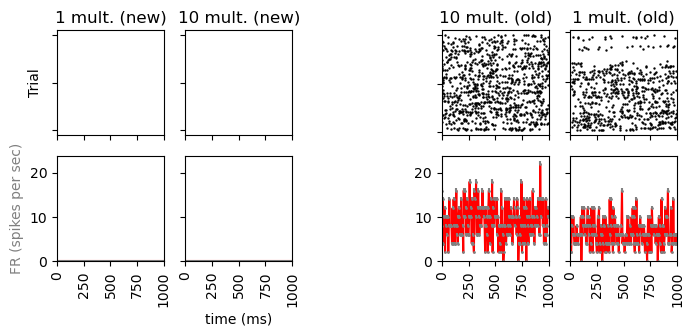

181    good
Name: group, dtype: object


/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:42: RuntimeWarning: invalid value encountered in divide
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:42: RuntimeWarning: invalid value encountered in double_scalars
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)


Lambda: 0.0, dipsersion: 0.0


/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:47: RuntimeWarning: invalid value encountered in divide
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:47: RuntimeWarning: invalid value encountered in double_scalars
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:48: RuntimeWarning: invalid value encountered in divide
  probsmean = 1 - poisson.cdf(np.mean(FRs,0)/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:48: RuntimeWarning: invalid value encountered in double_scalars
  probsmean = 1 - poisson.cdf(np.mean(FRs,0)/poisdisper, poislambda/poisdisper)
/Users/ackmanadmin/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divid

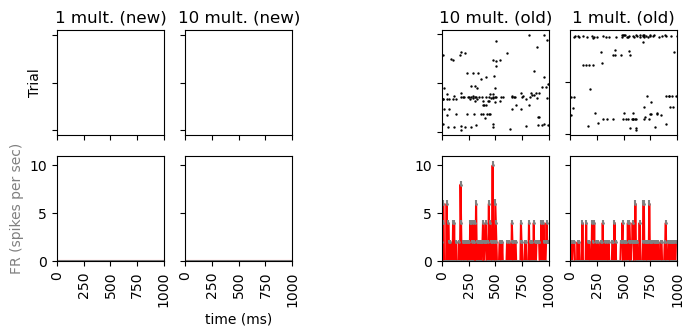

190    good
Name: group, dtype: object
Lambda: 0.059813084112149535, dipsersion: 0.056515852912918156


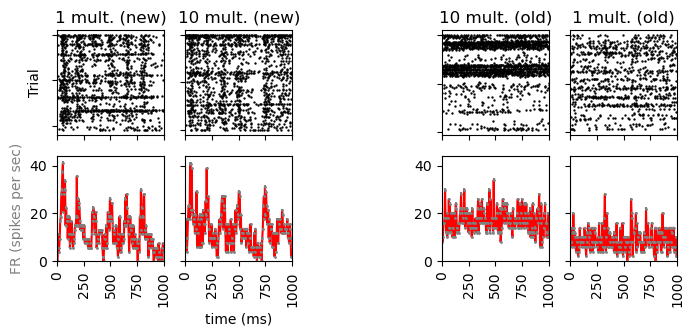

191    good
Name: group, dtype: object
Lambda: 0.04514018691588785, dipsersion: 0.043850213992488424


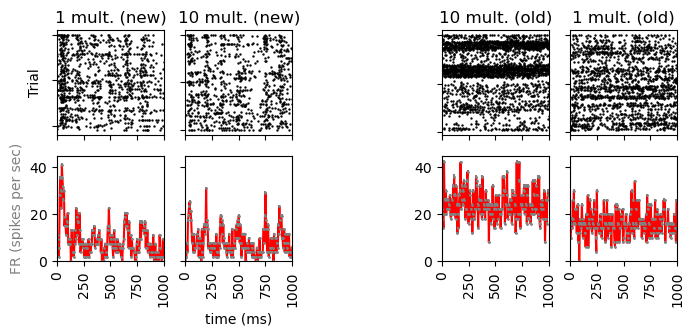

194    good
Name: group, dtype: object
Lambda: 0.007476635514018692, dipsersion: 0.007420735435409205


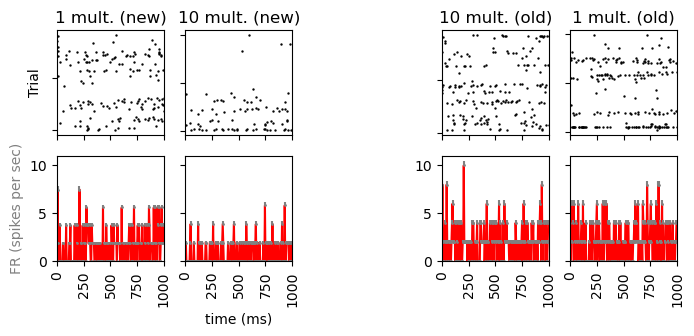

195    good
Name: group, dtype: object
Lambda: 0.003925233644859813, dipsersion: 0.004096742073543541


/Users/ackmanadmin/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/ackmanadmin/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


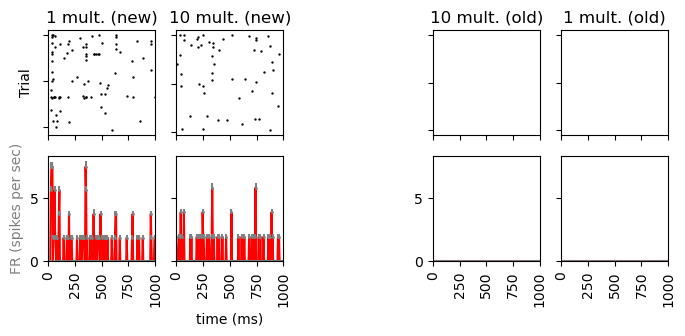

200    good
Name: group, dtype: object
Lambda: 0.0414018691588785, dipsersion: 0.04034195999650624


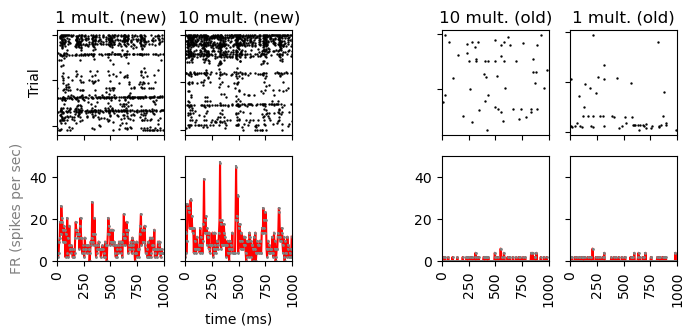

201    good
Name: group, dtype: object
Lambda: 0.008551401869158879, dipsersion: 0.008478275395231024


/Users/ackmanadmin/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/ackmanadmin/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


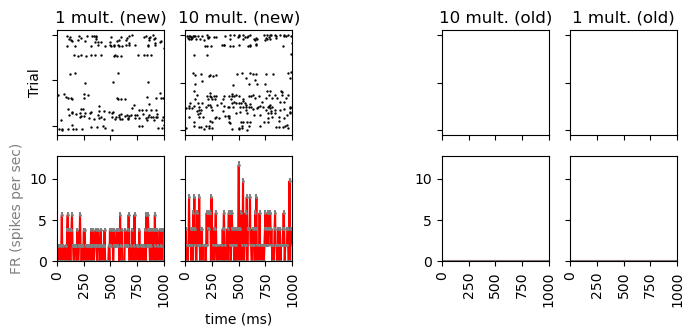

212    good
Name: group, dtype: object
Lambda: 0.007523364485981308, dipsersion: 0.007560221416717616


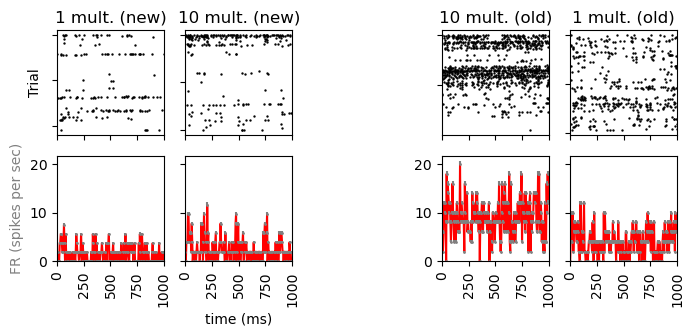

213    good
Name: group, dtype: object
Lambda: 0.032242990654205606, dipsersion: 0.03204450170320551


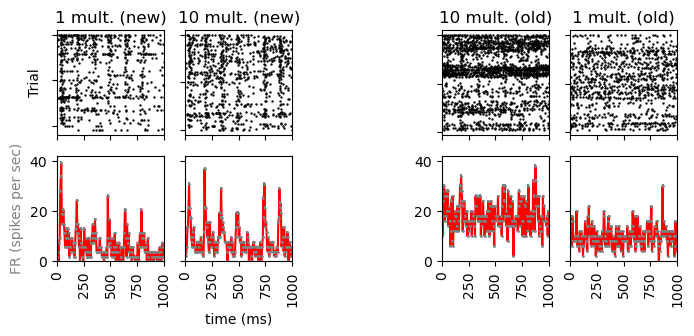

217    good
Name: group, dtype: object


/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:42: RuntimeWarning: invalid value encountered in divide
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:42: RuntimeWarning: invalid value encountered in double_scalars
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)


Lambda: 0.0, dipsersion: 0.0


/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:47: RuntimeWarning: invalid value encountered in divide
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:47: RuntimeWarning: invalid value encountered in double_scalars
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:48: RuntimeWarning: invalid value encountered in divide
  probsmean = 1 - poisson.cdf(np.mean(FRs,0)/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:48: RuntimeWarning: invalid value encountered in double_scalars
  probsmean = 1 - poisson.cdf(np.mean(FRs,0)/poisdisper, poislambda/poisdisper)
/Users/ackmanadmin/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divid

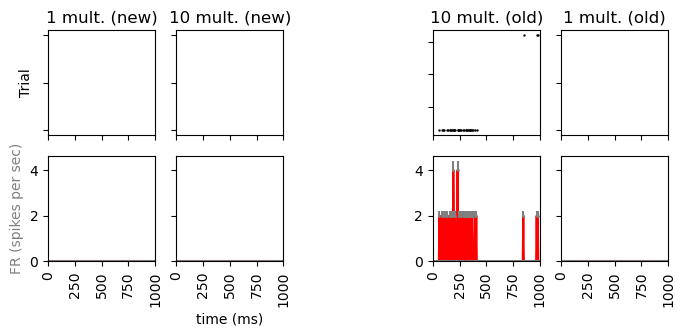

220    good
Name: group, dtype: object
Lambda: 0.007196261682242991, dipsersion: 0.007237933443968908


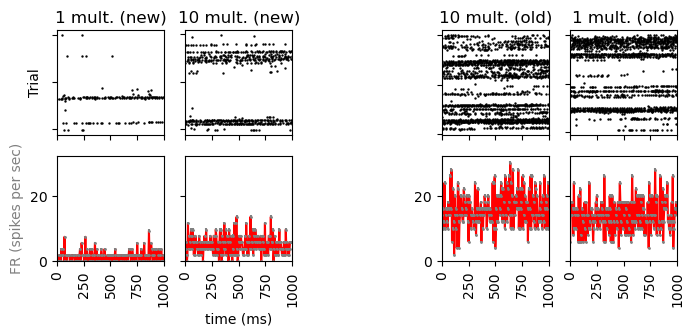

221    good
Name: group, dtype: object
Lambda: 0.03780373831775701, dipsersion: 0.036374615686959565


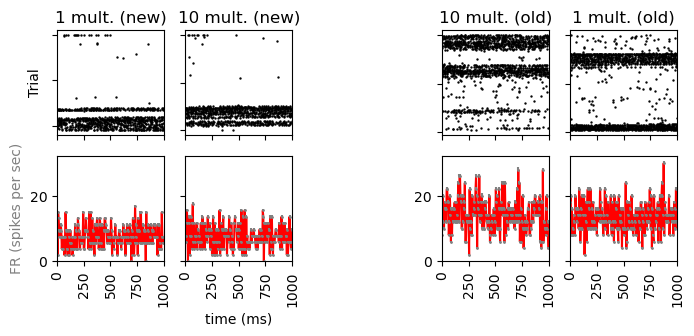

232    good
Name: group, dtype: object
Lambda: 0.00028037383177570094, dipsersion: 0.0002802952222901564


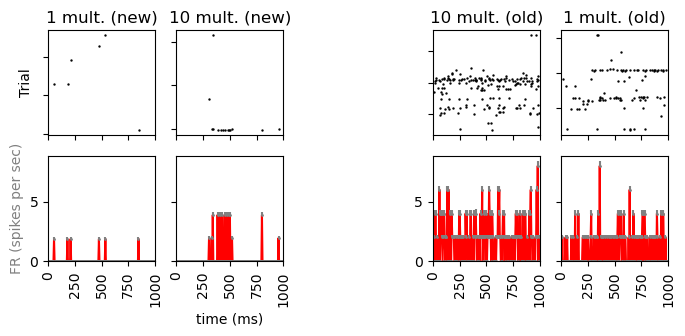

234    good
Name: group, dtype: object
Lambda: 0.0014018691588785046, dipsersion: 0.0013999039217398896


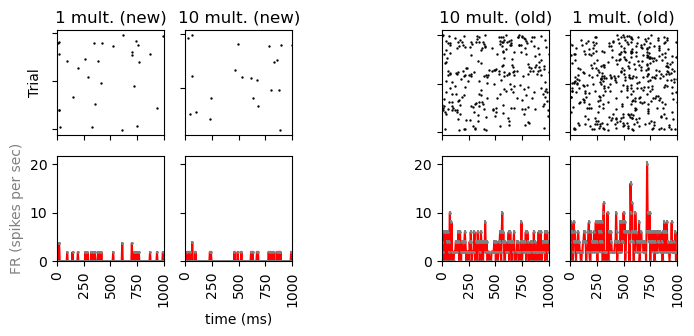

235    good
Name: group, dtype: object


/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:42: RuntimeWarning: invalid value encountered in divide
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:42: RuntimeWarning: invalid value encountered in double_scalars
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)


Lambda: 0.0, dipsersion: 0.0


/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:47: RuntimeWarning: invalid value encountered in divide
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:47: RuntimeWarning: invalid value encountered in double_scalars
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:48: RuntimeWarning: invalid value encountered in divide
  probsmean = 1 - poisson.cdf(np.mean(FRs,0)/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:48: RuntimeWarning: invalid value encountered in double_scalars
  probsmean = 1 - poisson.cdf(np.mean(FRs,0)/poisdisper, poislambda/poisdisper)
/Users/ackmanadmin/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divid

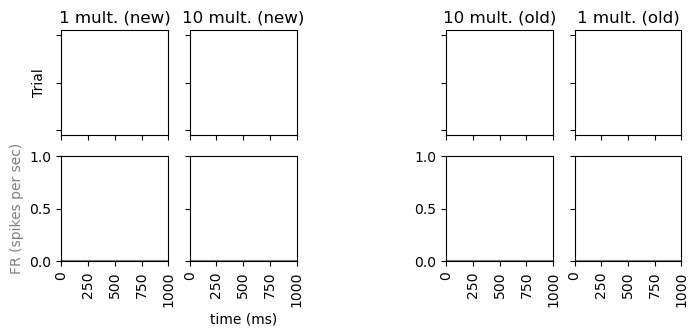

236    good
Name: group, dtype: object


/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:42: RuntimeWarning: invalid value encountered in divide
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:42: RuntimeWarning: invalid value encountered in double_scalars
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)


Lambda: 0.0, dipsersion: 0.0


/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:47: RuntimeWarning: divide by zero encountered in divide
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:47: RuntimeWarning: invalid value encountered in divide
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:47: RuntimeWarning: invalid value encountered in double_scalars
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:48: RuntimeWarning: divide by zero encountered in divide
  probsmean = 1 - poisson.cdf(np.mean(FRs,0)/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:48: RuntimeWarning: invalid value encountered in divide
  probsmean = 1 - poisson.cdf(np.mean(FR

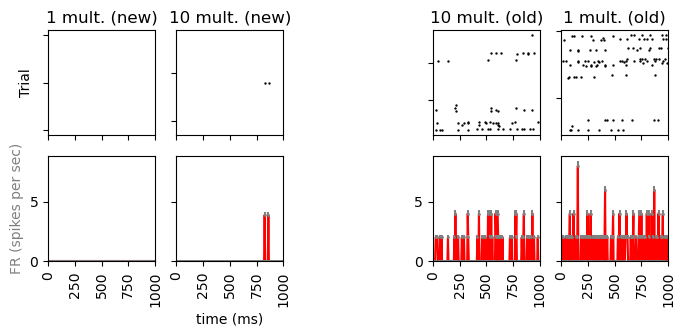

237    good
Name: group, dtype: object


/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:42: RuntimeWarning: invalid value encountered in divide
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:42: RuntimeWarning: invalid value encountered in double_scalars
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)


Lambda: 0.0, dipsersion: 0.0


/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:47: RuntimeWarning: invalid value encountered in divide
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:47: RuntimeWarning: invalid value encountered in double_scalars
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:48: RuntimeWarning: invalid value encountered in divide
  probsmean = 1 - poisson.cdf(np.mean(FRs,0)/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:48: RuntimeWarning: invalid value encountered in double_scalars
  probsmean = 1 - poisson.cdf(np.mean(FRs,0)/poisdisper, poislambda/poisdisper)
/Users/ackmanadmin/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divid

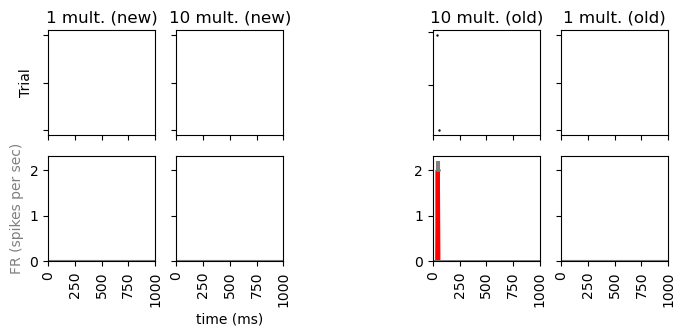

239    good
Name: group, dtype: object
Lambda: 0.007850467289719627, dipsersion: 0.0081626692287536


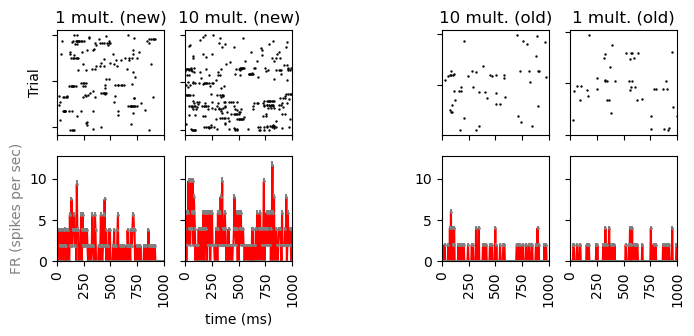

240    good
Name: group, dtype: object
Lambda: 0.00014018691588785047, dipsersion: 0.00014016726351646436


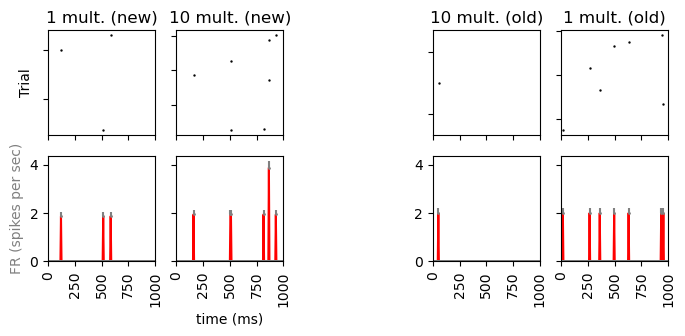

241    good
Name: group, dtype: object
Lambda: 0.003738317757009346, dipsersion: 0.003911258625207443


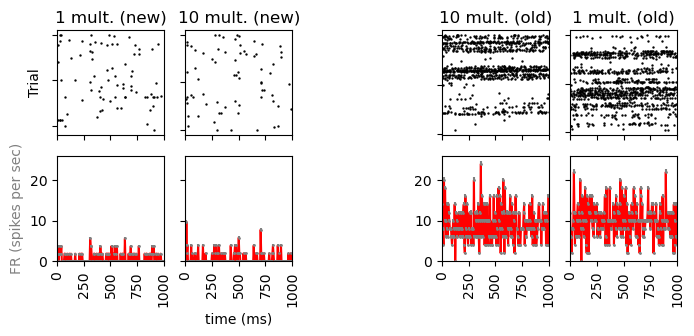

244    good
Name: group, dtype: object
Lambda: 0.00485981308411215, dipsersion: 0.005023111188750108


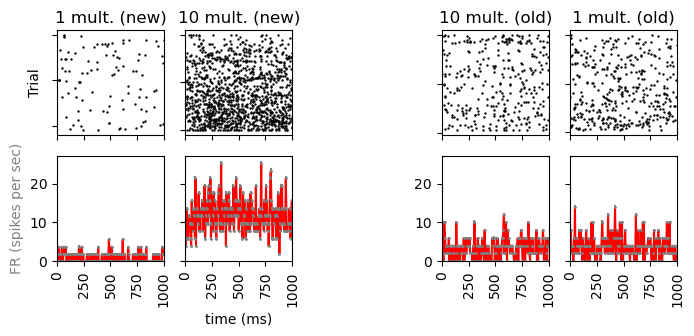

249    good
Name: group, dtype: object
Lambda: 0.06186915887850467, dipsersion: 0.05925631932919905


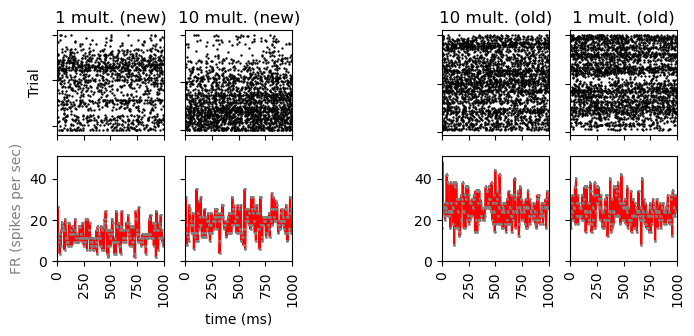

250    good
Name: group, dtype: object
Lambda: 0.00014018691588785047, dipsersion: 0.00014016726351646436


/Users/ackmanadmin/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/ackmanadmin/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


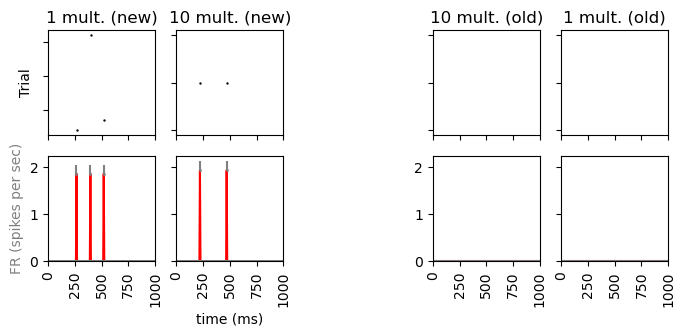

253    good
Name: group, dtype: object
Lambda: 0.0005607476635514019, dipsersion: 0.0005604332256092233


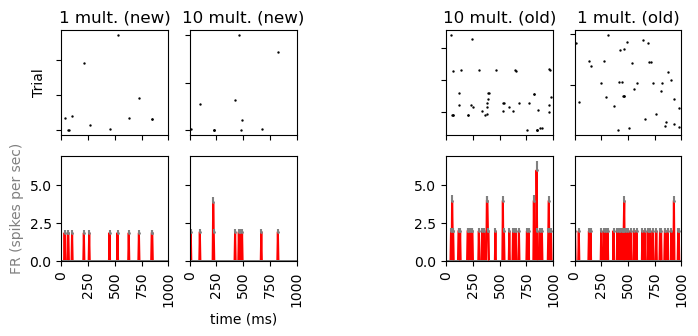

259    good
Name: group, dtype: object
Lambda: 0.0003271028037383178, dipsersion: 0.00032699580749410425


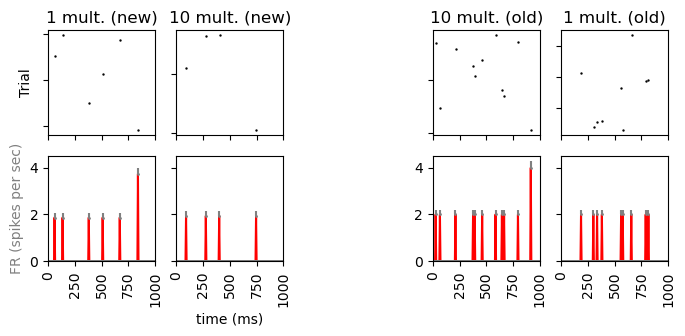

276    good
Name: group, dtype: object
Lambda: 0.017757009345794394, dipsersion: 0.01828281946021487


/Users/ackmanadmin/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


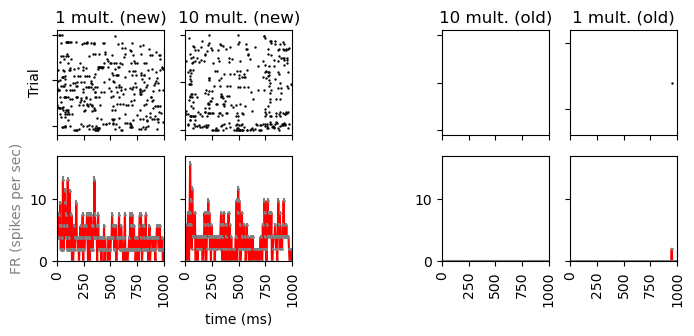

278    good
Name: group, dtype: object
Lambda: 0.06771028037383177, dipsersion: 0.07060223381954756


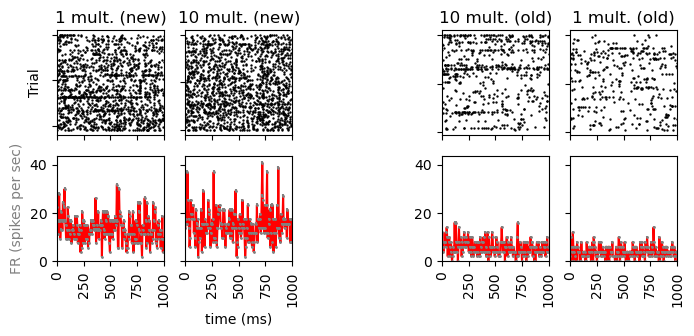

281    good
Name: group, dtype: object
Lambda: 0.00014018691588785047, dipsersion: 0.00014016726351646433


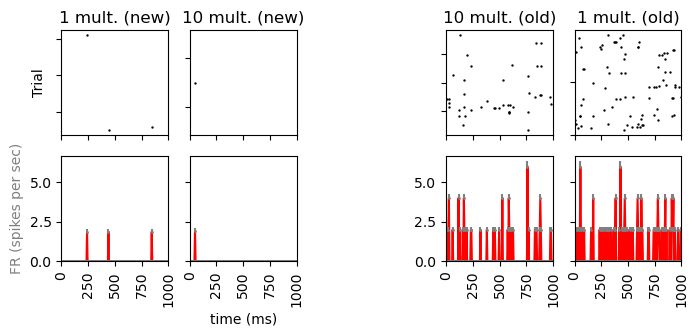

285    good
Name: group, dtype: object
Lambda: 0.0012149532710280374, dipsersion: 0.0012134771595772552


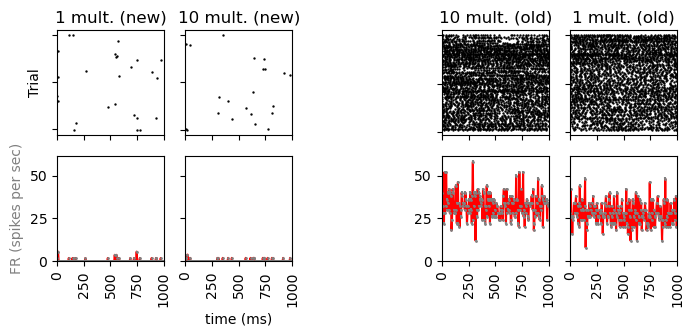

289    good
Name: group, dtype: object
Lambda: 0.15191588785046728, dipsersion: 0.12911782470084723


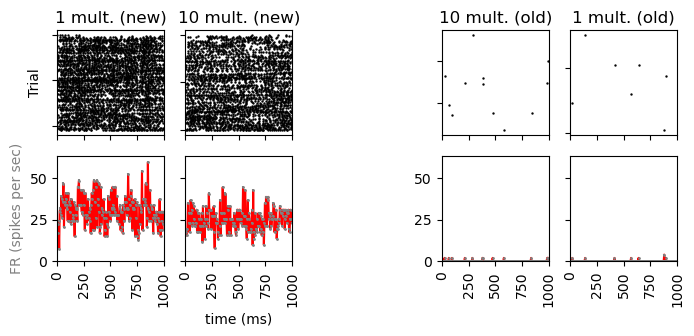

295    good
Name: group, dtype: object


/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:42: RuntimeWarning: invalid value encountered in divide
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:42: RuntimeWarning: invalid value encountered in double_scalars
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)


Lambda: 0.0, dipsersion: 0.0


/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:47: RuntimeWarning: invalid value encountered in divide
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:47: RuntimeWarning: invalid value encountered in double_scalars
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:48: RuntimeWarning: invalid value encountered in divide
  probsmean = 1 - poisson.cdf(np.mean(FRs,0)/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:48: RuntimeWarning: invalid value encountered in double_scalars
  probsmean = 1 - poisson.cdf(np.mean(FRs,0)/poisdisper, poislambda/poisdisper)
/Users/ackmanadmin/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divid

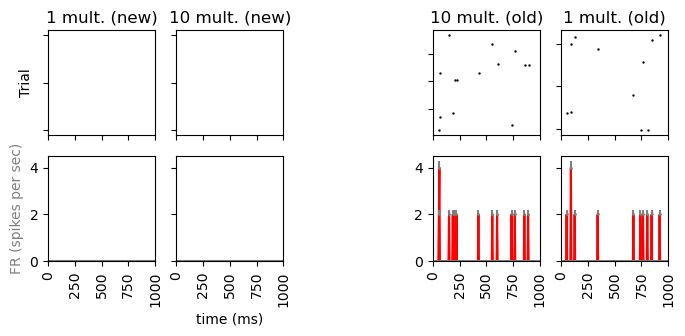

296    good
Name: group, dtype: object
Lambda: 0.0007476635514018691, dipsersion: 0.0007471045506157743


/Users/ackmanadmin/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/ackmanadmin/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


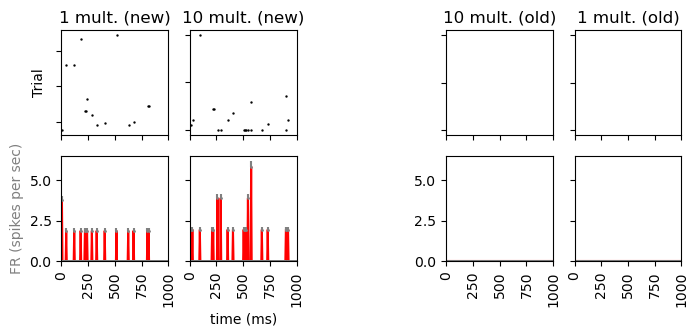

304    good
Name: group, dtype: object
Lambda: 0.00028037383177570094, dipsersion: 0.0002802952222901564


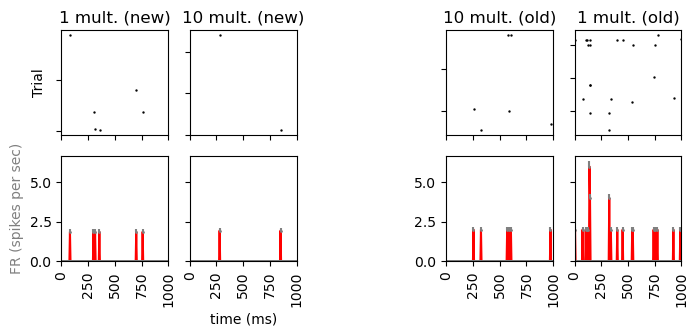

324    good
Name: group, dtype: object


/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:42: RuntimeWarning: invalid value encountered in divide
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:42: RuntimeWarning: invalid value encountered in double_scalars
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)


Lambda: 0.0, dipsersion: 0.0


/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:47: RuntimeWarning: invalid value encountered in divide
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:47: RuntimeWarning: invalid value encountered in double_scalars
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:48: RuntimeWarning: invalid value encountered in divide
  probsmean = 1 - poisson.cdf(np.mean(FRs,0)/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:48: RuntimeWarning: invalid value encountered in double_scalars
  probsmean = 1 - poisson.cdf(np.mean(FRs,0)/poisdisper, poislambda/poisdisper)
/Users/ackmanadmin/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divid

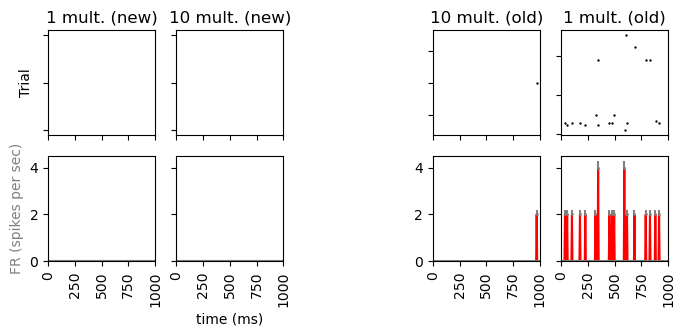

341    good
Name: group, dtype: object
Lambda: 0.04401869158878505, dipsersion: 0.042081046379596476


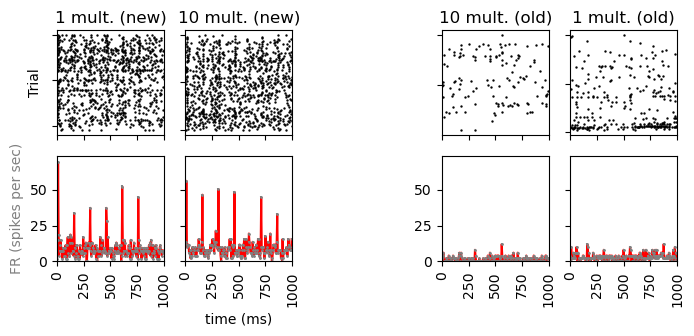

352    good
Name: group, dtype: object
Lambda: 0.1064018691588785, dipsersion: 0.09517396934230067


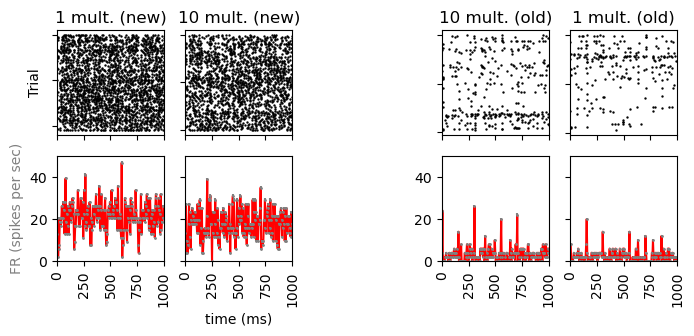

354    good
Name: group, dtype: object
Lambda: 0.005514018691588785, dipsersion: 0.005483614289457594


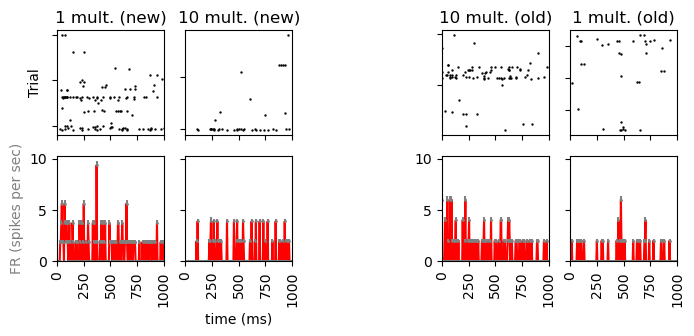

359    good
Name: group, dtype: object
Lambda: 0.025981308411214953, dipsersion: 0.025680111800157227


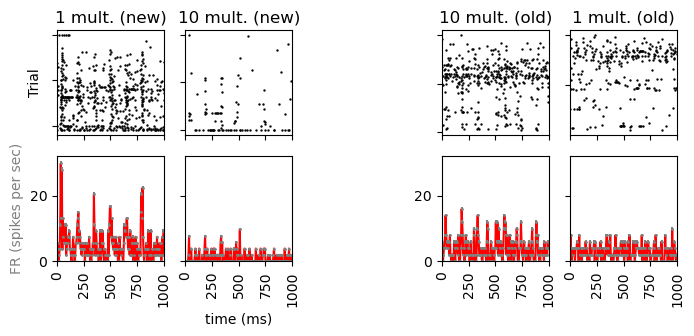

360    good
Name: group, dtype: object
Lambda: 0.00014018691588785047, dipsersion: 0.00014016726351646433


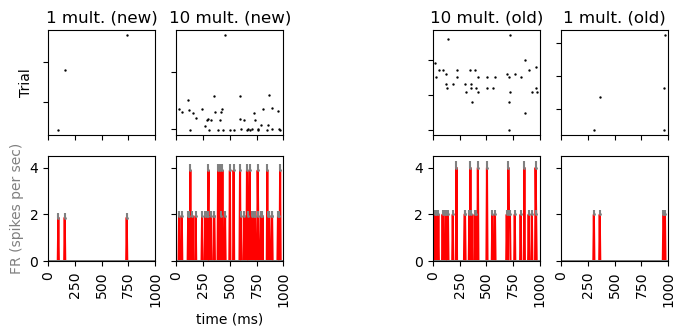

361    good
Name: group, dtype: object
Lambda: 0.19780373831775702, dipsersion: 0.16484564372434274


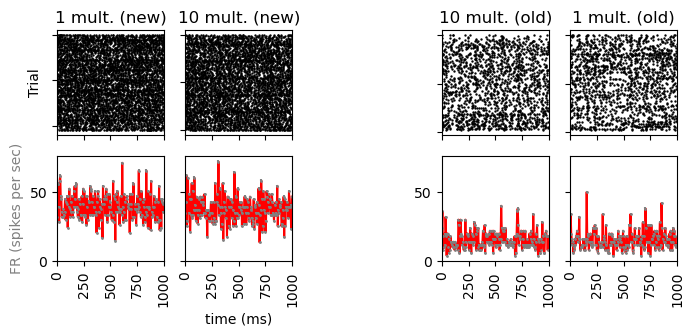

365    good
Name: group, dtype: object
Lambda: 0.21887850467289718, dipsersion: 0.176671639444493


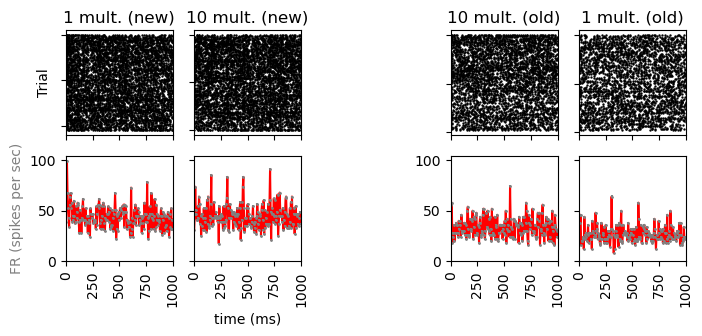

372    good
Name: group, dtype: object
Lambda: 0.11285046728971962, dipsersion: 0.10048907109791248


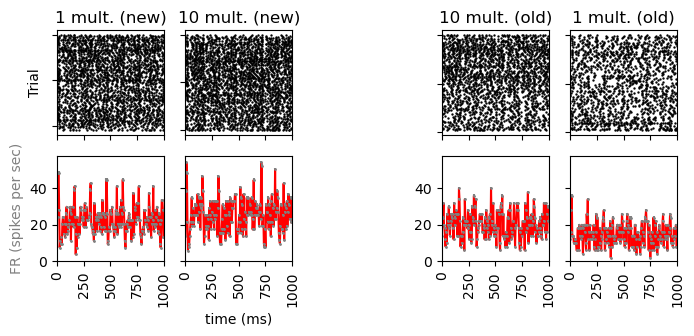

381    good
Name: group, dtype: object
Lambda: 0.0006542056074766356, dipsersion: 0.0006537776224997818


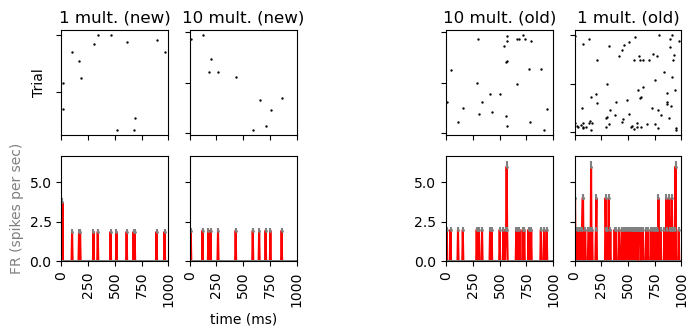

387    good
Name: group, dtype: object
Lambda: 0.1033177570093458, dipsersion: 0.09283011398375406


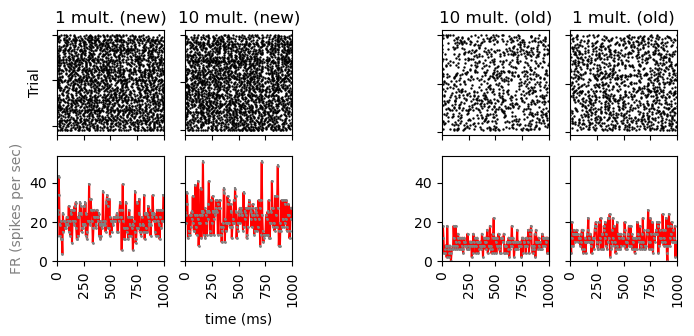

388    good
Name: group, dtype: object
Lambda: 0.05210280373831776, dipsersion: 0.049388101580924104


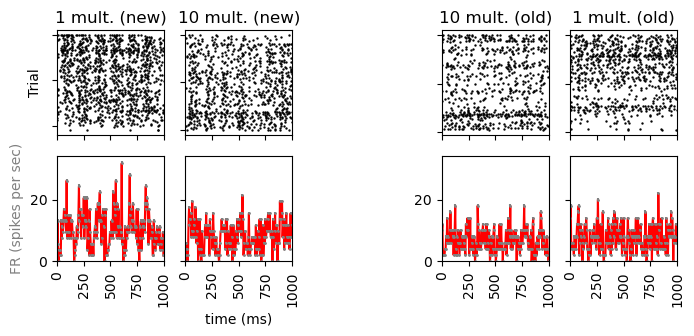

397    good
Name: group, dtype: object
Lambda: 0.03, dipsersion: 0.029099999999999997


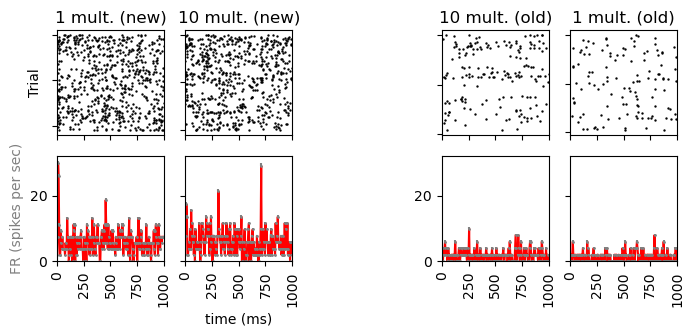

399    good
Name: group, dtype: object
Lambda: 0.12074766355140187, dipsersion: 0.10616766529827931


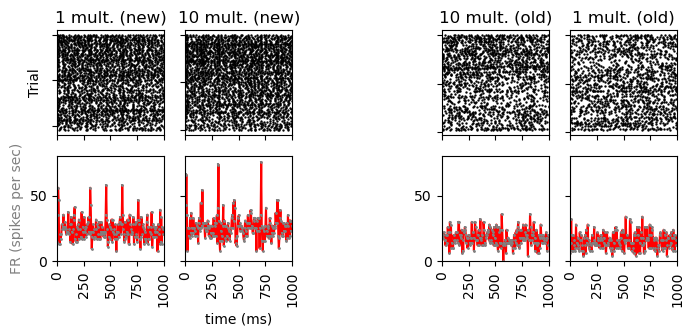

401    good
Name: group, dtype: object
Lambda: 0.0352803738317757, dipsersion: 0.03403566905406586


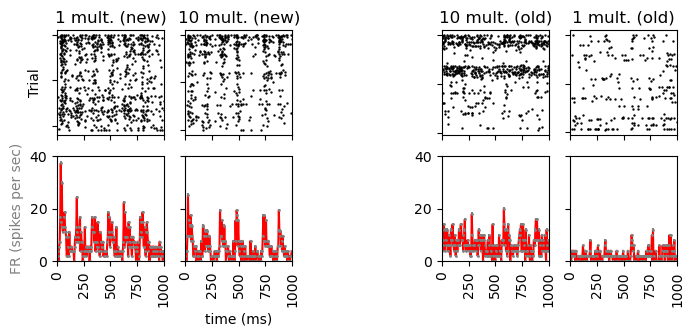

402    good
Name: group, dtype: object
Lambda: 0.03719626168224299, dipsersion: 0.038149148397239936


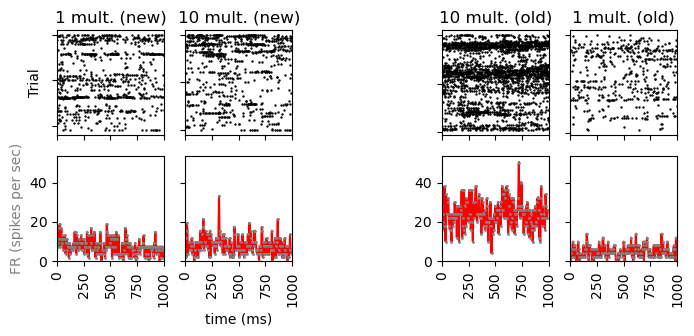

404    good
Name: group, dtype: object
Lambda: 0.2252336448598131, dipsersion: 0.17497073980260283


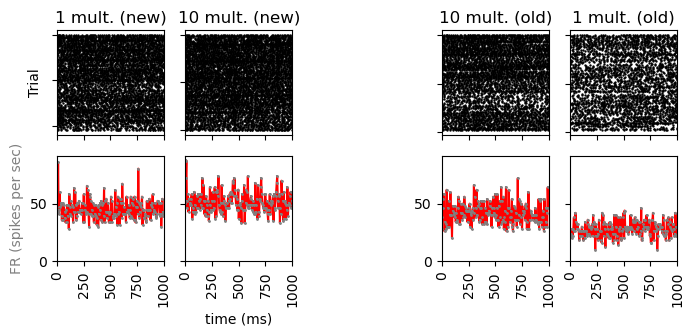

405    good
Name: group, dtype: object
Lambda: 0.2816355140186916, dipsersion: 0.21138237182286665


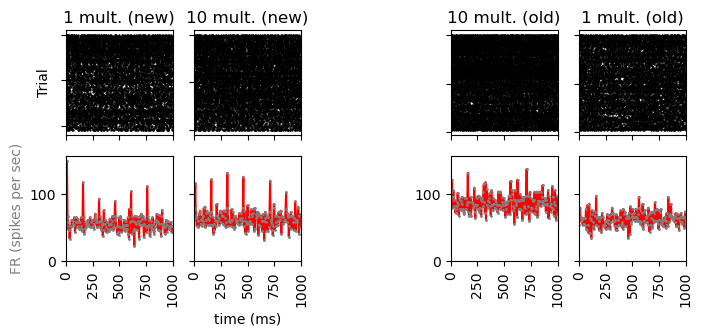

409    good
Name: group, dtype: object
Lambda: 0.2995327102803738, dipsersion: 0.21149510874312172


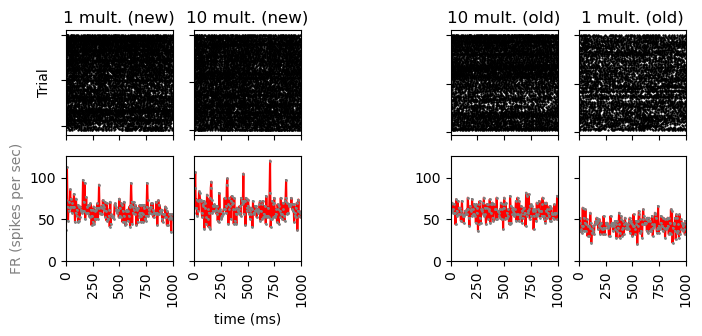

413    good
Name: group, dtype: object
Lambda: 0.037383177570093455, dipsersion: 0.03598567560485633


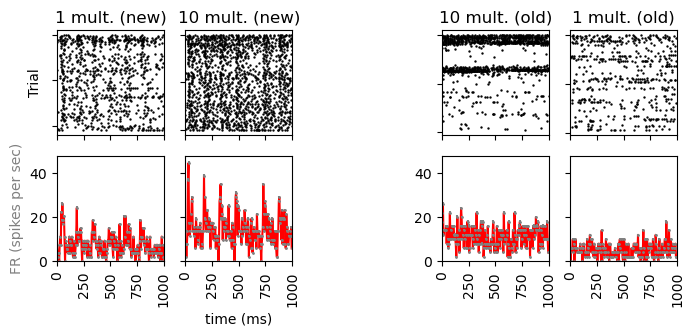

415    good
Name: group, dtype: object
Lambda: 0.013738317757009346, dipsersion: 0.01354957638221678


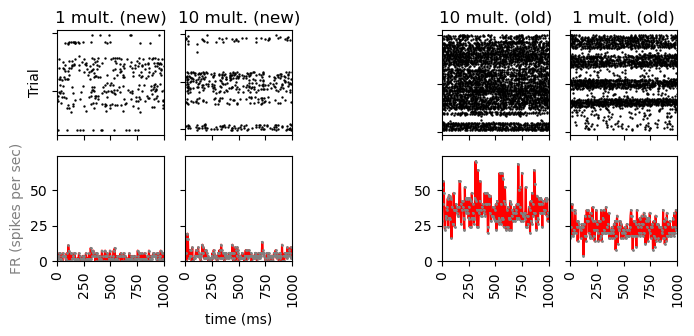

422    good
Name: group, dtype: object
Lambda: 0.0004205607476635514, dipsersion: 0.0004203838763210762


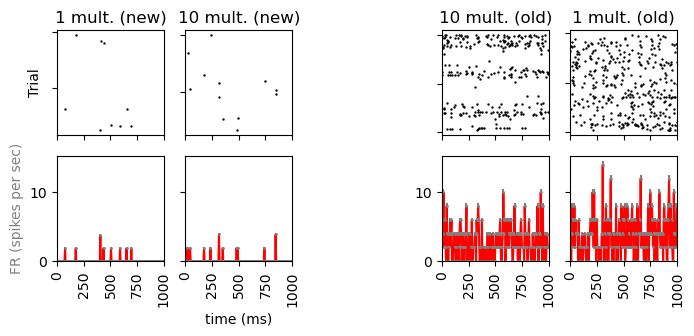

423    good
Name: group, dtype: object
Lambda: 0.04719626168224299, dipsersion: 0.04496877456546423


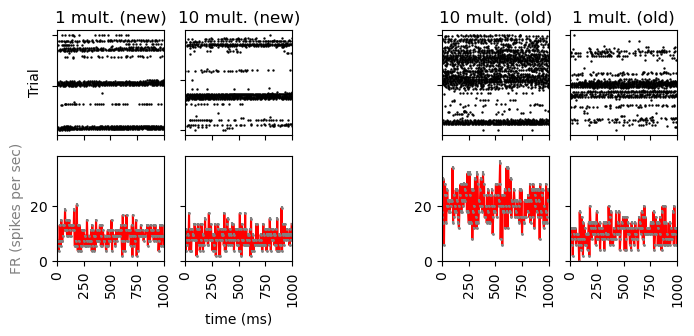

426    good
Name: group, dtype: object
Lambda: 0.008317757009345795, dipsersion: 0.008248571927679272


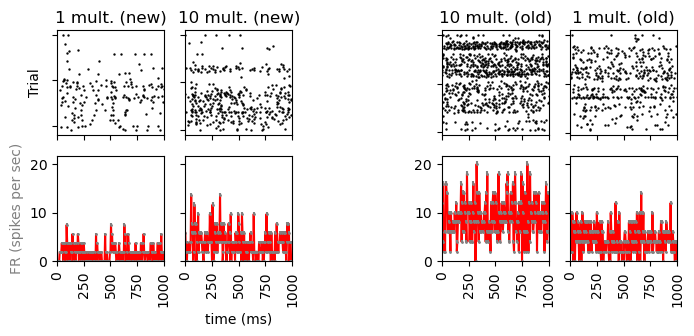

427    good
Name: group, dtype: object
Lambda: 9.345794392523364e-05, dipsersion: 9.344920953795096e-05


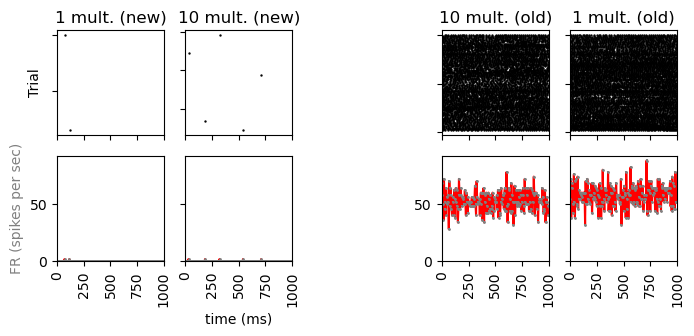

429    good
Name: group, dtype: object
Lambda: 0.0017289719626168223, dipsersion: 0.0017259826185693078


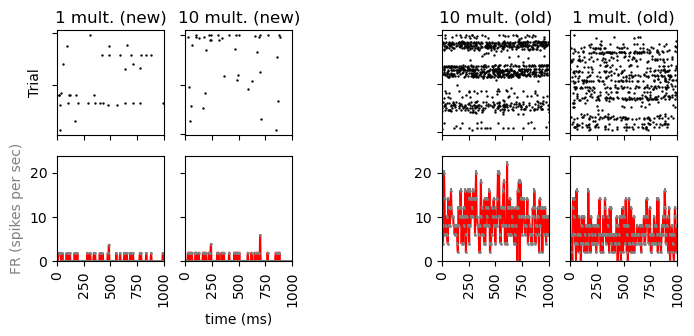

431    good
Name: group, dtype: object
Lambda: 0.002803738317757009, dipsersion: 0.0027958773692025496


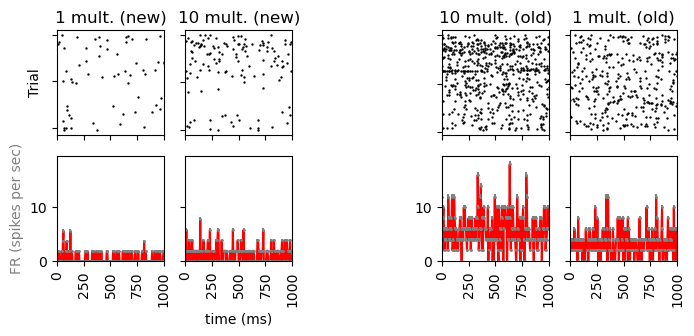

433    good
Name: group, dtype: object


/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:42: RuntimeWarning: invalid value encountered in divide
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:42: RuntimeWarning: invalid value encountered in double_scalars
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)


Lambda: 0.0, dipsersion: 0.0


/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:47: RuntimeWarning: invalid value encountered in divide
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:47: RuntimeWarning: invalid value encountered in double_scalars
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:48: RuntimeWarning: invalid value encountered in divide
  probsmean = 1 - poisson.cdf(np.mean(FRs,0)/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:48: RuntimeWarning: invalid value encountered in double_scalars
  probsmean = 1 - poisson.cdf(np.mean(FRs,0)/poisdisper, poislambda/poisdisper)
/Users/ackmanadmin/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divid

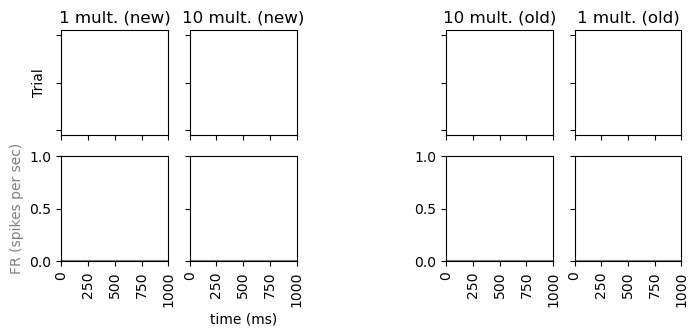

435    good
Name: group, dtype: object
Lambda: 0.00705607476635514, dipsersion: 0.007006286575246746


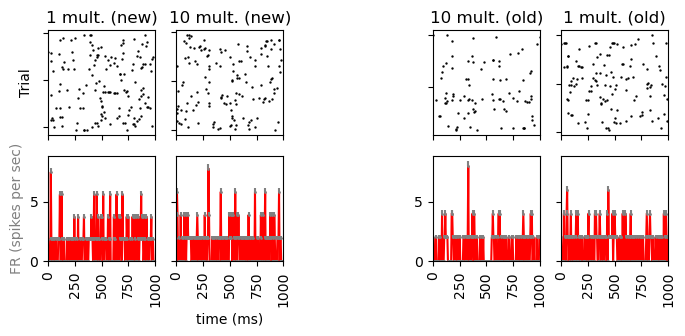

438    good
Name: group, dtype: object
Lambda: 0.0358411214953271, dipsersion: 0.03464999344920953


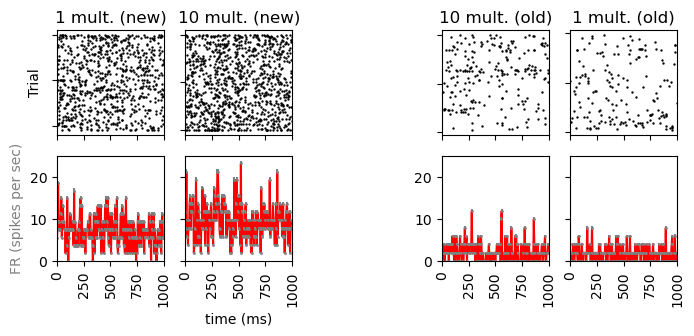

445    good
Name: group, dtype: object
Lambda: 0.0027102803738317757, dipsersion: 0.0027963926980522306


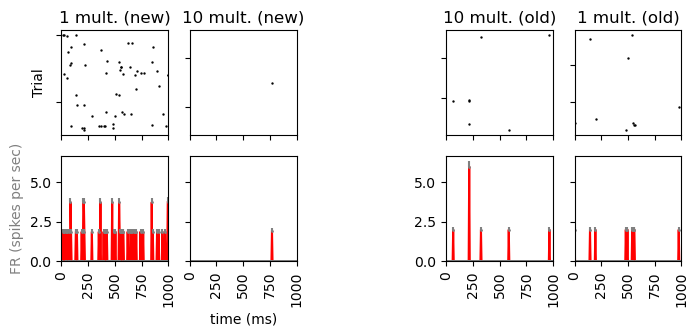

460    good
Name: group, dtype: object
Lambda: 0.00018691588785046728, dipsersion: 0.00018688095030133624


/Users/ackmanadmin/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


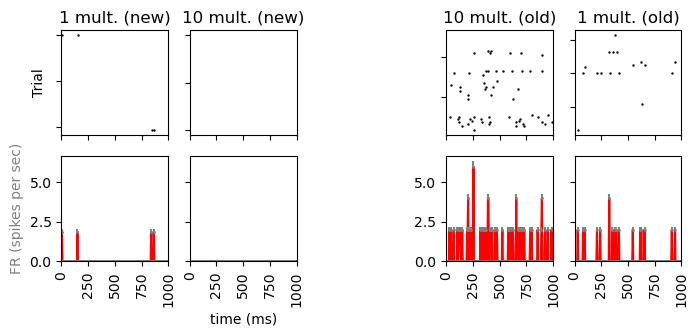

466    good
Name: group, dtype: object
Lambda: 0.0030373831775700934, dipsersion: 0.0031216154249279413


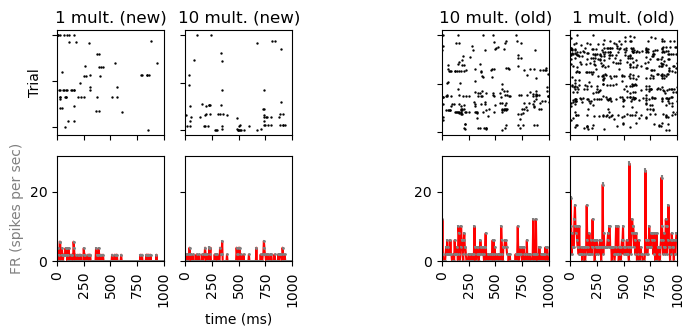

474    good
Name: group, dtype: object
Lambda: 0.0003271028037383178, dipsersion: 0.00032699580749410425


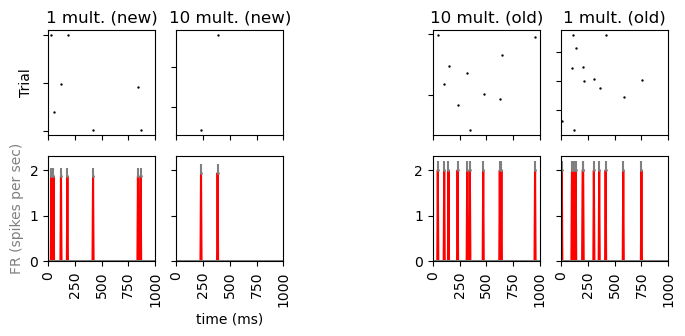

485    good
Name: group, dtype: object
Lambda: 0.003738317757009346, dipsersion: 0.004004716569132675


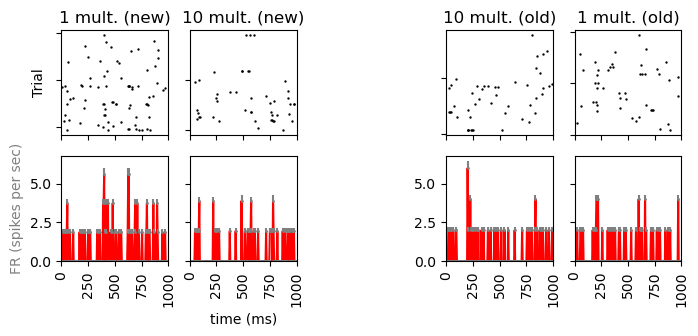

486    good
Name: group, dtype: object
Lambda: 0.0009345794392523365, dipsersion: 0.0009337060005240631


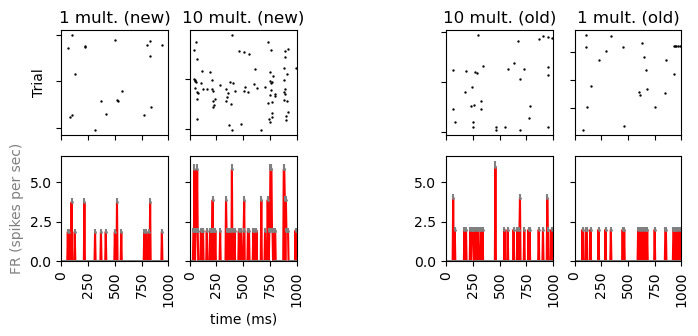

487    good
Name: group, dtype: object
Lambda: 0.00018691588785046728, dipsersion: 0.00018688095030133624


/Users/ackmanadmin/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


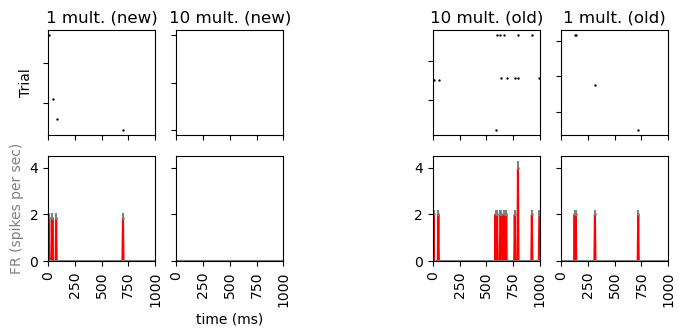

489    good
Name: group, dtype: object
Lambda: 0.14158878504672898, dipsersion: 0.12182177482749584


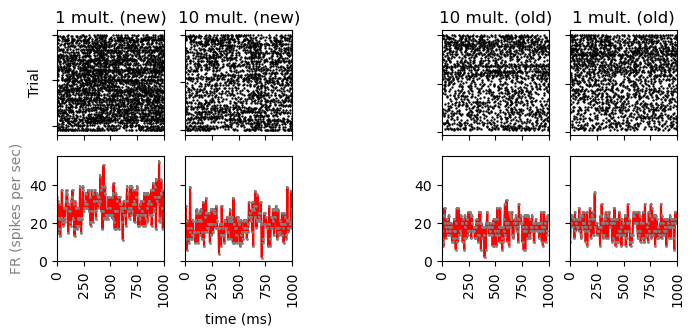

502    good
Name: group, dtype: object
Lambda: 0.0051401869158878505, dipsersion: 0.005113765394357589


/Users/ackmanadmin/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/ackmanadmin/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


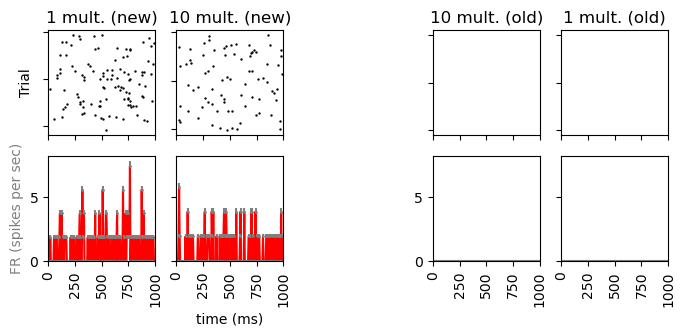

505    good
Name: group, dtype: object
Lambda: 0.018878504672897197, dipsersion: 0.019082854397763995


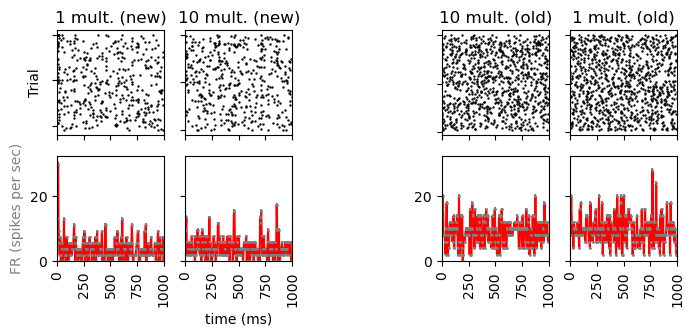

509    good
Name: group, dtype: object
Lambda: 0.0007476635514018691, dipsersion: 0.000840562494541008


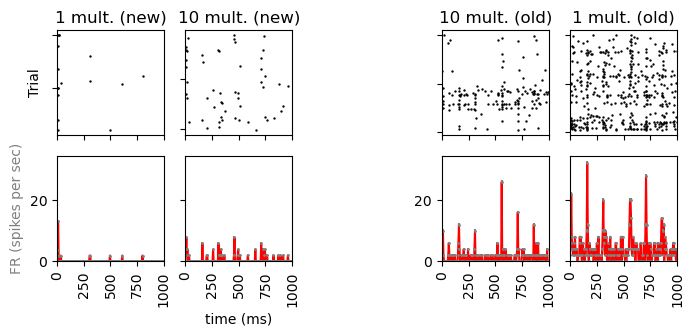

513    good
Name: group, dtype: object
Lambda: 0.0005607476635514019, dipsersion: 0.0005604332256092232


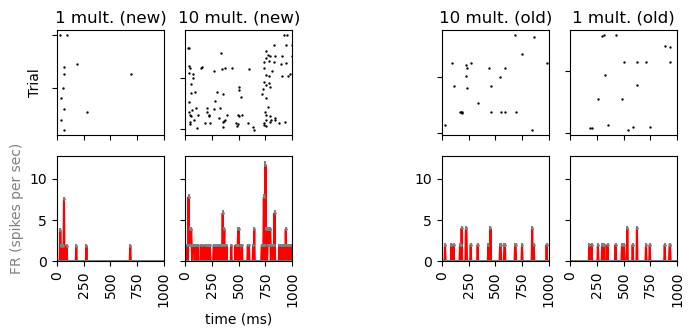

517    good
Name: group, dtype: object


/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:42: RuntimeWarning: invalid value encountered in divide
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:42: RuntimeWarning: invalid value encountered in double_scalars
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)


Lambda: 0.0, dipsersion: 0.0


/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:47: RuntimeWarning: invalid value encountered in divide
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:47: RuntimeWarning: invalid value encountered in double_scalars
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:48: RuntimeWarning: invalid value encountered in divide
  probsmean = 1 - poisson.cdf(np.mean(FRs,0)/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:48: RuntimeWarning: invalid value encountered in double_scalars
  probsmean = 1 - poisson.cdf(np.mean(FRs,0)/poisdisper, poislambda/poisdisper)
/Users/ackmanadmin/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divid

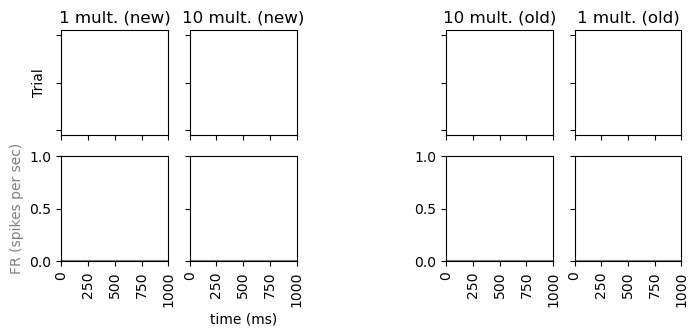

524    good
Name: group, dtype: object


/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:42: RuntimeWarning: invalid value encountered in divide
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:42: RuntimeWarning: invalid value encountered in double_scalars
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)


Lambda: 0.0, dipsersion: 0.0


/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:47: RuntimeWarning: divide by zero encountered in divide
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:47: RuntimeWarning: invalid value encountered in divide
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:47: RuntimeWarning: invalid value encountered in double_scalars
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:48: RuntimeWarning: divide by zero encountered in divide
  probsmean = 1 - poisson.cdf(np.mean(FRs,0)/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:48: RuntimeWarning: invalid value encountered in divide
  probsmean = 1 - poisson.cdf(np.mean(FR

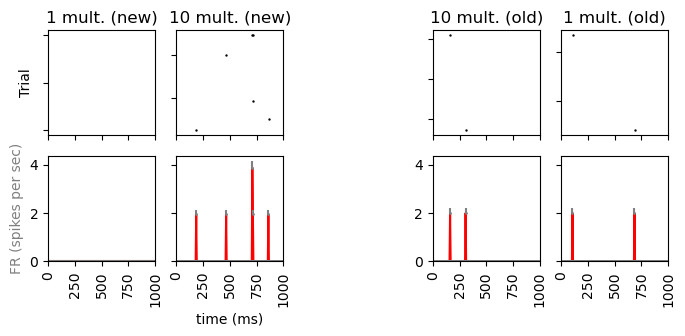

527    good
Name: group, dtype: object
Lambda: 0.013364485981308412, dipsersion: 0.013185876495763822


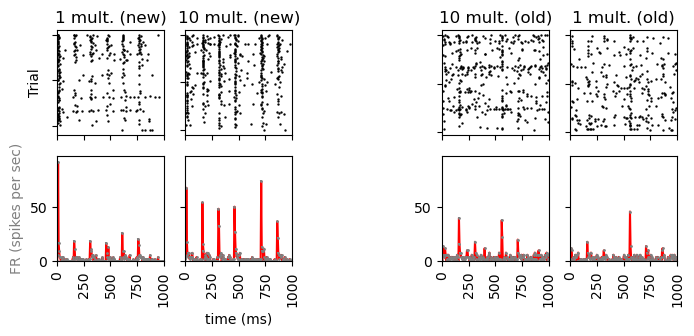

531    good
Name: group, dtype: object
Lambda: 0.39350467289719626, dipsersion: 0.2399671565202201


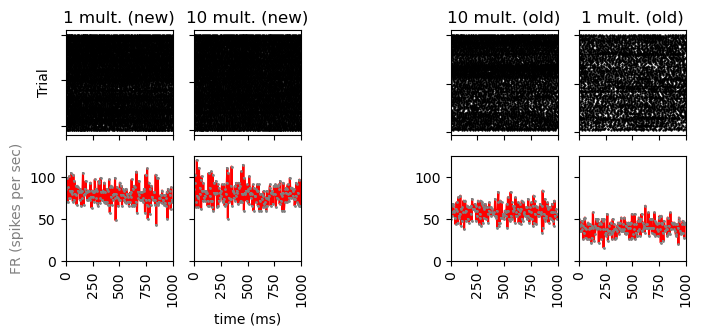

541    good
Name: group, dtype: object
Lambda: 0.00028037383177570094, dipsersion: 0.0003737531662153902


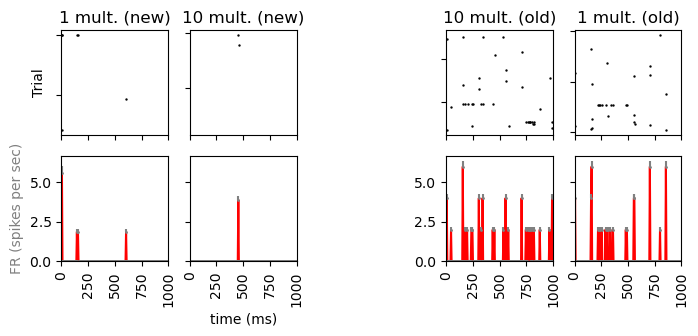

549    good
Name: group, dtype: object
Lambda: 0.3931308411214953, dipsersion: 0.24156963708620843


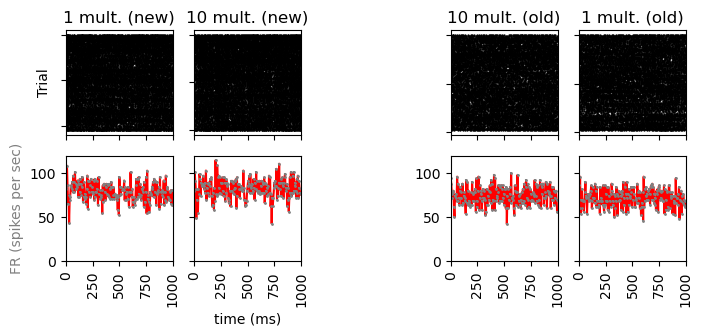

556    good
Name: group, dtype: object
Lambda: 4.672897196261682e-05, dipsersion: 4.672678836579616e-05


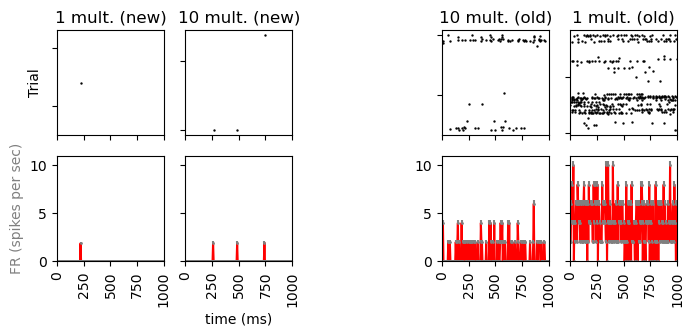

560    good
Name: group, dtype: object
Lambda: 0.0014018691588785046, dipsersion: 0.0013999039217398896


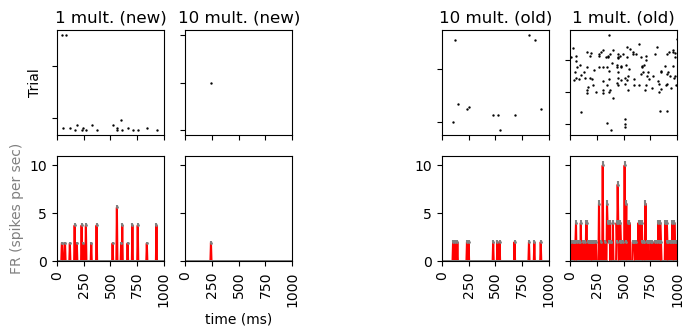

570    good
Name: group, dtype: object
Lambda: 4.672897196261682e-05, dipsersion: 4.672678836579616e-05


/Users/ackmanadmin/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


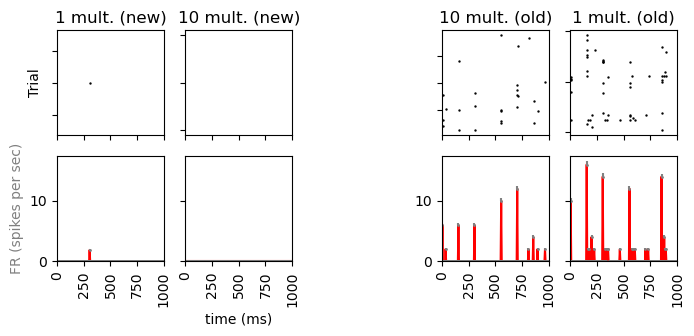

584    good
Name: group, dtype: object
Lambda: 0.011121495327102804, dipsersion: 0.01099780766879203


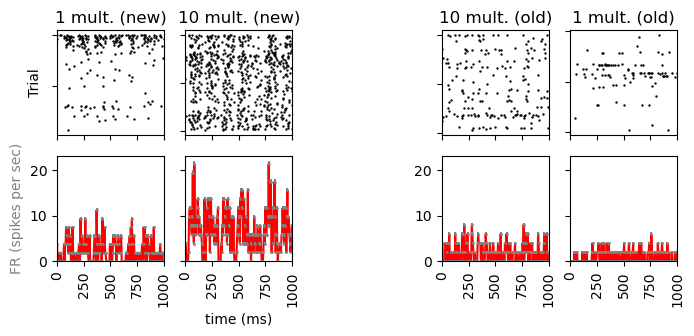

591    good
Name: group, dtype: object
Lambda: 0.0006074766355140187, dipsersion: 0.0006071076076513233


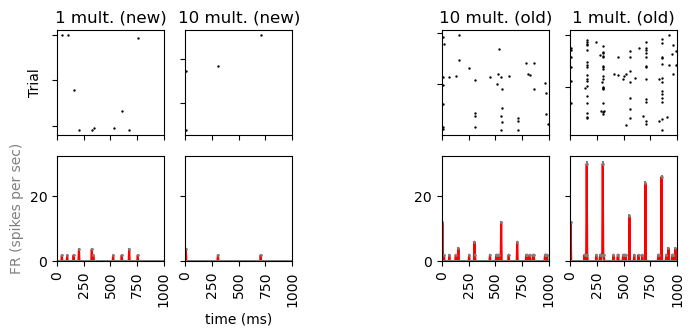

596    good
Name: group, dtype: object
Lambda: 4.672897196261682e-05, dipsersion: 4.672678836579616e-05


/Users/ackmanadmin/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


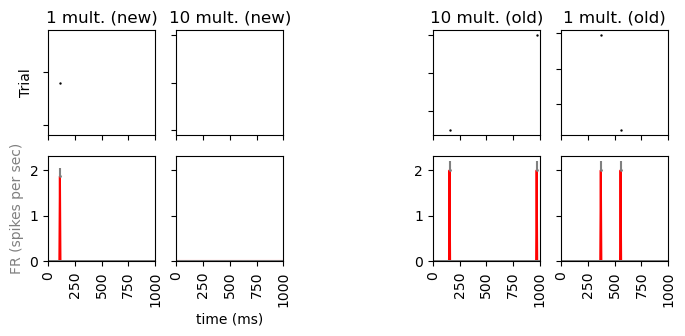

600    good
Name: group, dtype: object
Lambda: 0.09742990654205608, dipsersion: 0.09261021704952399


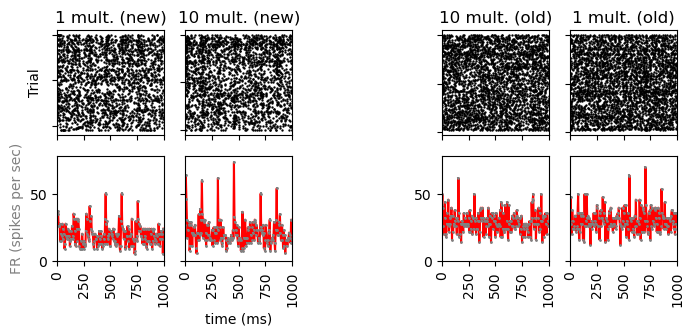

606    good
Name: group, dtype: object
Lambda: 0.017523364485981307, dipsersion: 0.017309754126997985


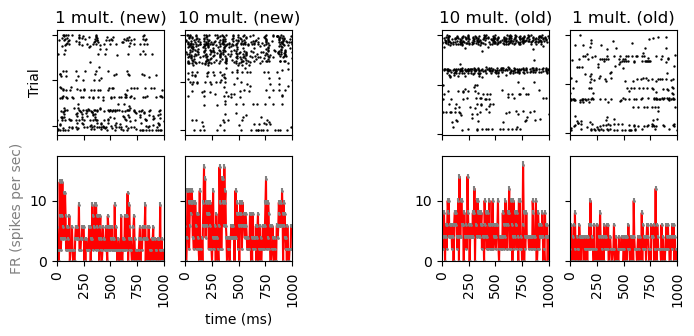

607    good
Name: group, dtype: object
Lambda: 0.034813084112149534, dipsersion: 0.03360113328674993


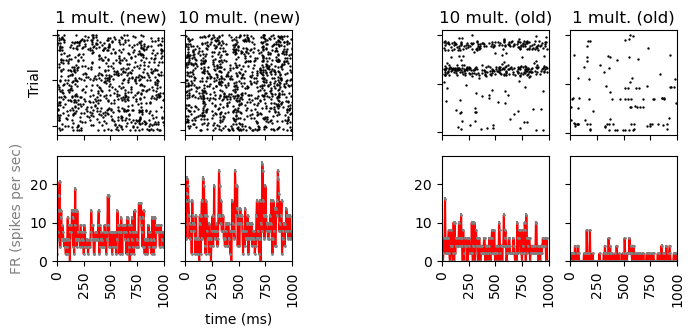

610    good
Name: group, dtype: object
Lambda: 0.11289719626168224, dipsersion: 0.10043179316970911


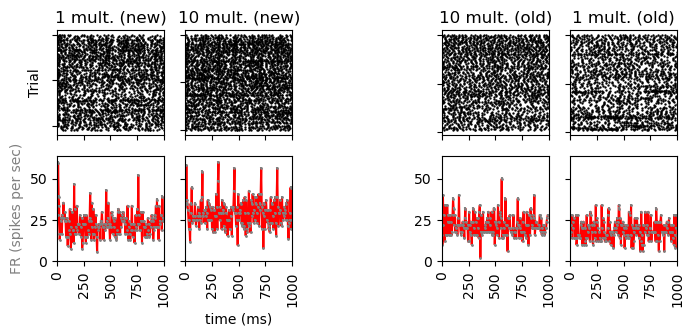

611    good
Name: group, dtype: object
Lambda: 0.12042056074766355, dipsersion: 0.10648019696043322


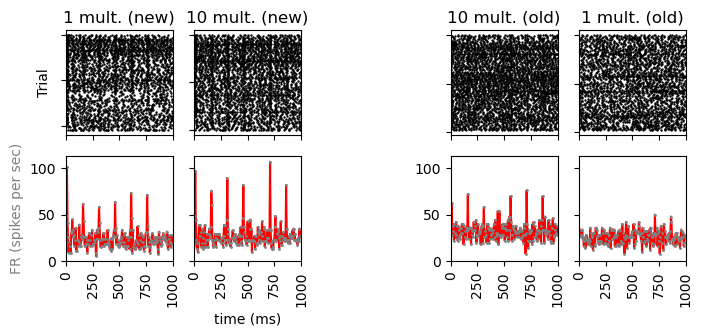

619    good
Name: group, dtype: object
Lambda: 0.022289719626168224, dipsersion: 0.02188634596908027


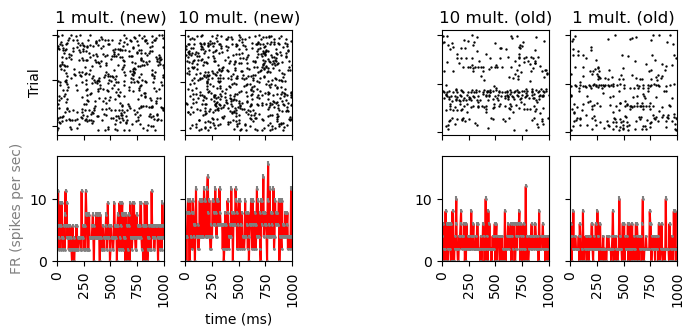

624    good
Name: group, dtype: object
Lambda: 0.00705607476635514, dipsersion: 0.007006286575246746


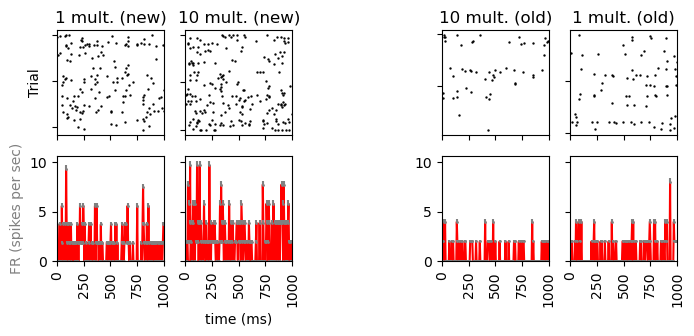

628    good
Name: group, dtype: object
Lambda: 0.16518691588785048, dipsersion: 0.13799365665123595


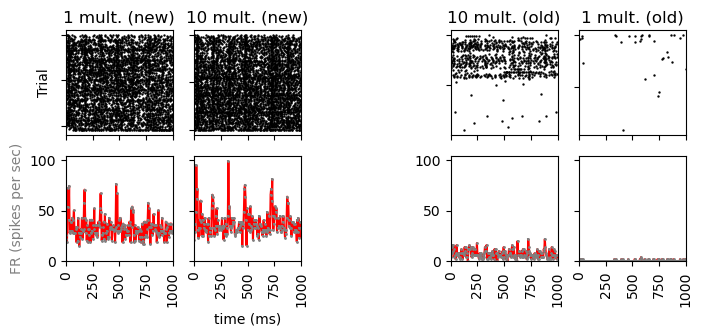

631    good
Name: group, dtype: object
Lambda: 0.006495327102803738, dipsersion: 0.0065465957725565575


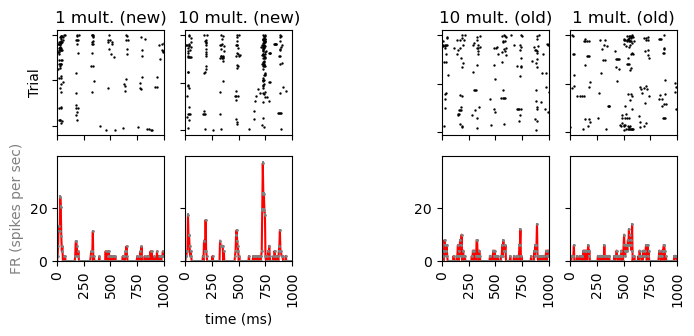

634    good
Name: group, dtype: object
Lambda: 0.06172897196261682, dipsersion: 0.05791850598305531


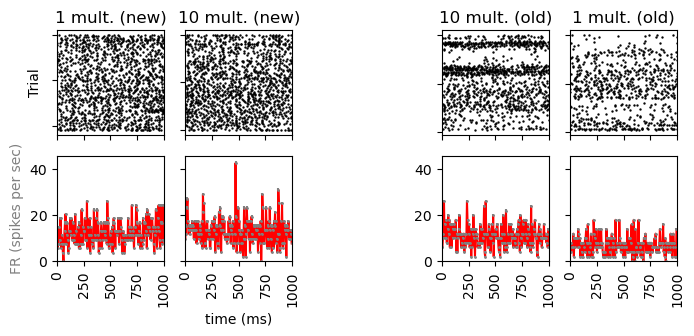

637    good
Name: group, dtype: object
Lambda: 0.13817757009345794, dipsersion: 0.12086023015110489


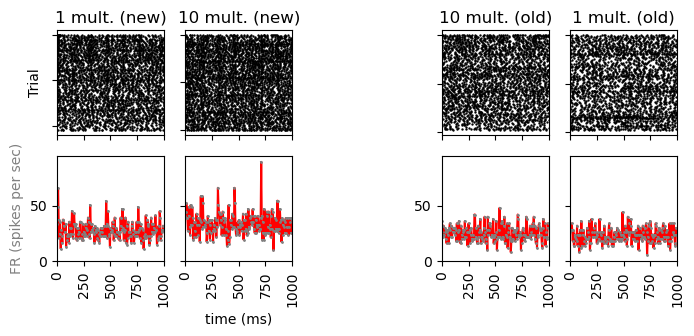

638    good
Name: group, dtype: object
Lambda: 0.004252336448598131, dipsersion: 0.004234254083326054


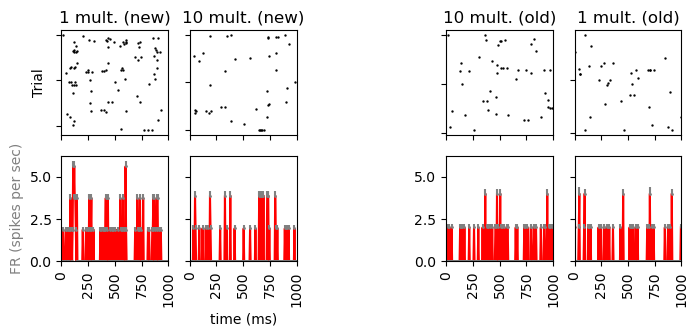

639    good
Name: group, dtype: object
Lambda: 0.00046728971962616824, dipsersion: 0.0004670713599441001


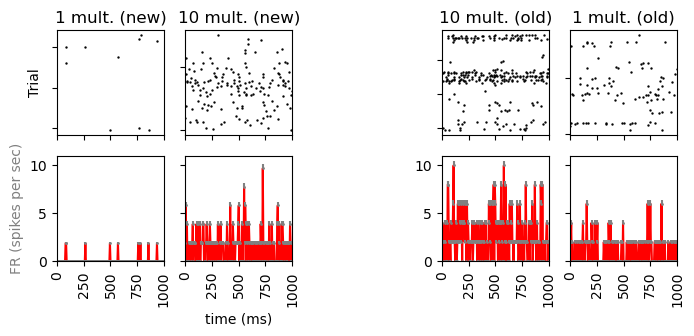

648    good
Name: group, dtype: object
Lambda: 0.00028037383177570094, dipsersion: 0.0002802952222901564


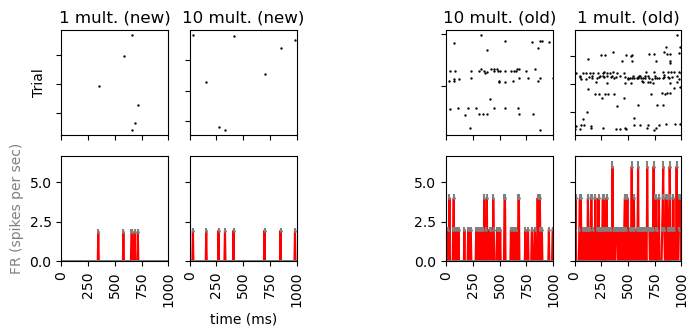

651    good
Name: group, dtype: object
Lambda: 0.0, dipsersion: 0.0


/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:42: RuntimeWarning: invalid value encountered in divide
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:42: RuntimeWarning: invalid value encountered in double_scalars
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:47: RuntimeWarning: invalid value encountered in divide
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:47: RuntimeWarning: invalid value encountered in double_scalars
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:48: RuntimeWarning: invalid value encountered in divide
  probsmean = 1 - poisson.cdf(np.mean(FRs,0)/pois

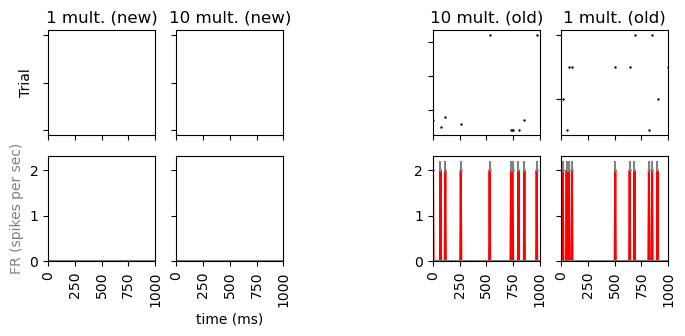

652    good
Name: group, dtype: object
Lambda: 0.06135514018691589, dipsersion: 0.057684144903485016


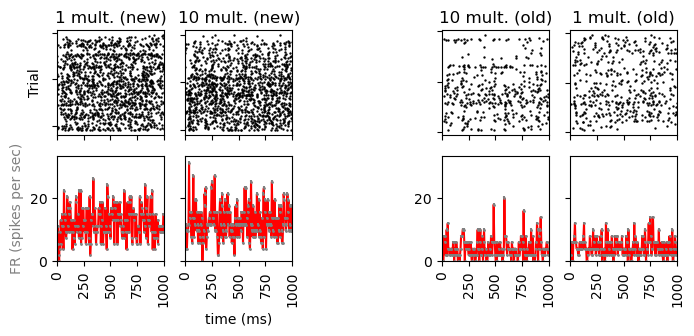

658    good
Name: group, dtype: object
Lambda: 0.036588785046728974, dipsersion: 0.03543696174338369


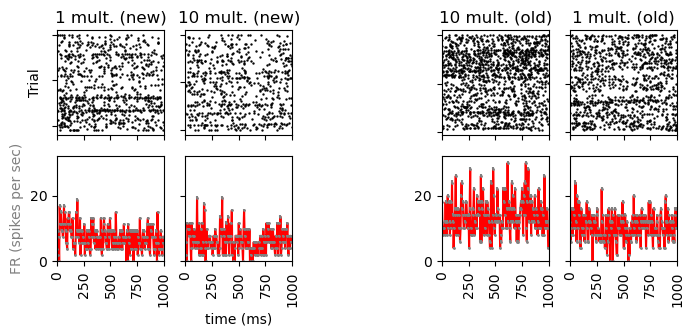

660    good
Name: group, dtype: object
Lambda: 0.003177570093457944, dipsersion: 0.003167473141759106


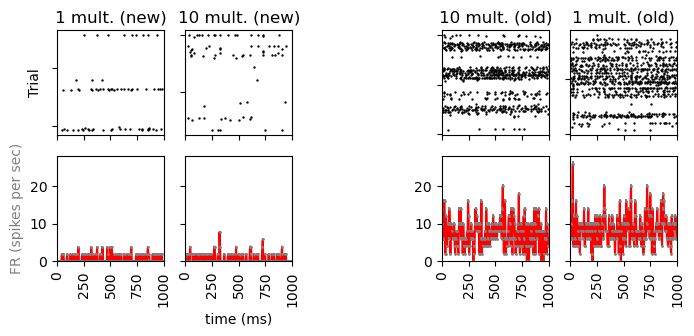

667    good
Name: group, dtype: object
Lambda: 0.0014485981308411215, dipsersion: 0.0014464996942964445


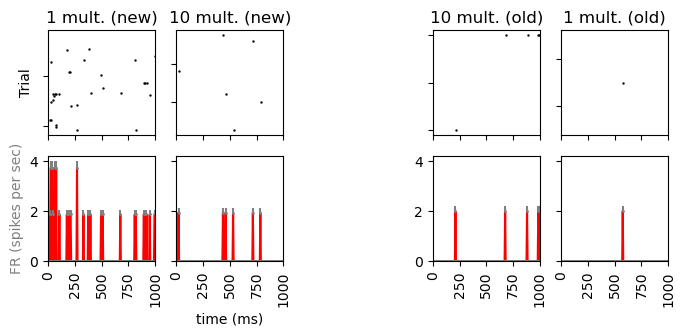

668    good
Name: group, dtype: object


/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:42: RuntimeWarning: invalid value encountered in divide
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:42: RuntimeWarning: invalid value encountered in double_scalars
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)


Lambda: 0.0, dipsersion: 0.0


/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:47: RuntimeWarning: invalid value encountered in divide
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:47: RuntimeWarning: invalid value encountered in double_scalars
  probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:48: RuntimeWarning: invalid value encountered in divide
  probsmean = 1 - poisson.cdf(np.mean(FRs,0)/poisdisper, poislambda/poisdisper)
/var/folders/nt/_5lxb3_s6yl37rq6nmtyws4m0000gp/T/ipykernel_79892/4128788301.py:48: RuntimeWarning: invalid value encountered in double_scalars
  probsmean = 1 - poisson.cdf(np.mean(FRs,0)/poisdisper, poislambda/poisdisper)
/Users/ackmanadmin/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divid

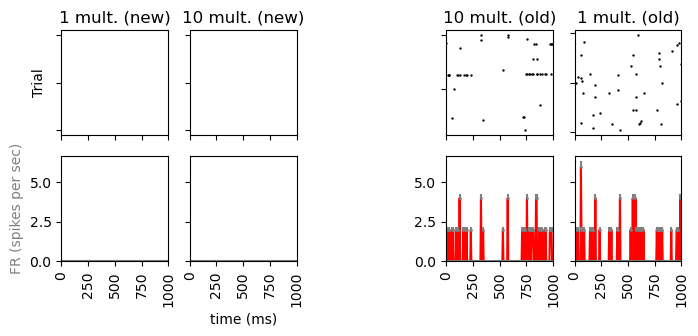

669    good
Name: group, dtype: object
Lambda: 0.0006542056074766356, dipsersion: 0.0007472355664250155


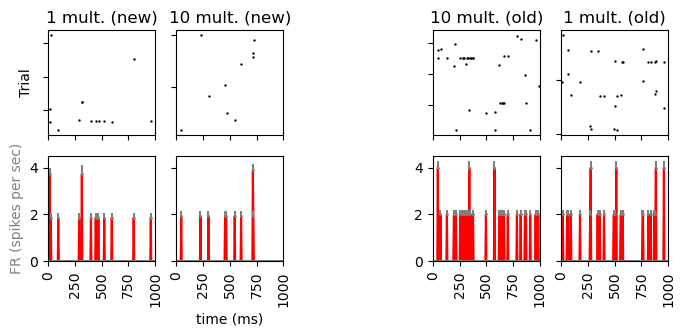

674    good
Name: group, dtype: object
Lambda: 4.672897196261682e-05, dipsersion: 4.672678836579616e-05


/Users/ackmanadmin/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/ackmanadmin/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/ackmanadmin/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


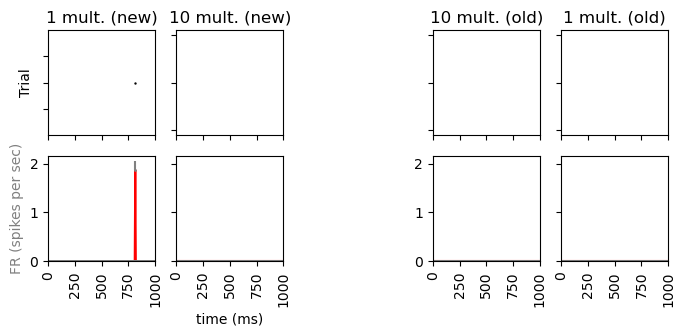

In [65]:
rate = 30000
windowsz = 5
verbose = True
datasets = data_raw.datasep[[1,2,3,7,8,9]]
print(datasets)
# n_neurons = cluster['cluster_id'].tolist()
# n_neurons = neurons['cluster_id'].tolist()
show = data_raw.IDs

for n, neuron in enumerate(show):
    print(data_raw.cluster.loc[data_raw.cluster['cluster_id']==neuron, 'group'])

    all_data = np.array(data_raw.asdf[n])
    rise2 = np.array(data_raw.ttl_times)[::6]
    fig, axs = plt.subplots(2, len(datasets)-1, figsize = (8,3))

    for d, dataset in enumerate(datasets[:-1]):
        if d == 2:
            axs[0][d].axis('off')
            axs[1][d].axis('off')
            continue
        start = dataset
        end = datasets[d+1]
        m_data = all_data[(all_data>=start)&(all_data< end)]
        window = np.array(rise2)[(rise2>=start)&(rise2 < end)]
        w_data = []
        if len(window)==0:
            window = np.arange(start, end+1, 1)
            window = window[window<51]
            print('default window')
        bins = np.arange(0,1000+windowsz,windowsz)
        FRs = np.zeros((len(window),len(bins)-1))
        for w, win in enumerate(window):
            if w != len(window)-1:
                temp = m_data[(m_data <= window[w+1])&(m_data > win)] - win
                axs[0][d].scatter(temp, -1*w*np.ones(temp.shape), s = .5, color = 'k')
            w_data.extend(temp)
            FRs[w], _ = np.histogram(temp, bins=bins)
        if d==0:
            poislambda = np.mean(FRs)
            poisdisper = np.std(FRs)**2
            probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)
            if verbose:
                print('Lambda: {0}, dipsersion: {1}'.format(poislambda, poisdisper))

        else:   
            probs = 1 - poisson.cdf(FRs/poisdisper, poislambda/poisdisper)
            probsmean = 1 - poisson.cdf(np.mean(FRs,0)/poisdisper, poislambda/poisdisper)

            meanprobs = np.mean(np.squeeze(np.sum([probs< 0.01],1))/probs.shape[0])
            stdprobs = np.std(np.squeeze(np.sum([probs< 0.01],1))/probs.shape[0])

            sigprobs = 1-norm.cdf(np.squeeze(np.sum([probs < 0.01],1))/probs.shape[0],
                          meanprobs , stdprobs)
        axs[1][d].plot(bins[:-1]+(windowsz/1000)/2, np.mean(FRs/(windowsz/1000),0), color='red')
        axs[1][d].errorbar(bins[:-1]+(windowsz/1000)/2, np.mean(FRs/(windowsz/1000),0),
                           yerr=[np.zeros(len(bins)-1),np.std(FRs/(windowsz/1000),0)/FRs.shape[0]], 
                        fmt = 'o', color='grey', markersize=1)

        axs[0][d].set_xticks([0,250,500,750,1000])
        axs[0][d].set_xticklabels([])
        axs[1][d].set_xticks([0,250,500,750,1000])
        axs[1][d].set_xticklabels([0,250,500,750,1000], rotation=90)
        axs[0][d].set_xlim(0,1000)
        axs[0][d].set_yticklabels([])
    clims = [0,0]
    plims = [0,0]
    for d, dataset in enumerate(datasets[:-1]):
        lims = axs[1][d].get_ylim()
        if lims[1] > clims[1]:
            clims[1] = lims[1]
#         lims = secondm[d].get_ylim()
#         if lims[1] > plims[1]:
#             plims[1] = lims [1]
    for d, dataset in enumerate(datasets[:-1]):
        axs[1][d].set_xlim(0,1000)
        axs[1][d].set_ylim(clims)
#         secondm[d].set_ylim(plims)
#         if d==1:
#             axs[1][d].fill_betweenx((0,clims[1]), 1, color='blue', alpha=(d)/(2),zorder=0)

    axs[1][1].set_xlabel('time (ms)')
    axs[1][0].set_ylabel('FR (spikes per sec)', color='grey')
    axs[0][0].set_ylabel('Trial')
    axs[0][0].set_title('Spont.')
#     axs[0][1].set_title('Aud. stim')
    axs[0][0].set_title('1 mult. (new)')
    axs[0][1].set_title('10 mult. (new)')
    axs[0][3].set_title('10 mult. (old)')
    axs[0][4].set_title('1 mult. (old)')
#     axs[0][3].set_title('+ 5% laser')
#     axs[0][5].set_title('+ 50% l')
#     axs[0][6].set_title('+ 75% l')
#     axs[0][7].set_title('+ 100% l')
    for a in [1,4]:
        axs[1][a].set_yticklabels([])
#         secondm[a].set_yticklabels([])


#     secondm[len(datasets)-2].set_ylabel('Precent of trials w/ sig FR', color='r')
#     plt.savefig('{0}_cluster_aud_resp.png'.format(neuron))
    plt.show()